In [2]:
import os, sys
sys.path.append('/Applications/Python_Files/')

import numpy as np
import scipy as sp
from scipy.special import factorial as fac
from scipy.special import erf as erf
from scipy import signal as sig
import matplotlib.pyplot as plt
from iminuit import Minuit
import modules_VX_X as mod

def gaussian(x, c, s):
    dx = x[1] - x[0]
    return np.exp(-(x-c)**2/(2*s**2))*dx/np.sqrt(2*np.pi*s**2)

In [40]:
data = mod.impData(Path = "/Applications/Data-Processed/Livermore/191005/Laser_12p15A_p110e/", 
                   fileList = ["Laser_12.15A_p110e.txt"], Delim = '\t', tline = 0)
ring = data.keys()[:-1]
xcol = data.keys()[-1]
line = [row for row in ring if '1' in row][0]
delim = line[line.find('1')-1]
dnum = [it for it, item in enumerate(line.split(delim)) if '1' == item][0]
ring.sort(key = lambda line: int(line.split(delim)[dnum]))
print("#####\t\t\tWarning! Warning! Warning!\t\t\t#####")
print("Insure that the column ouput in order or you will have errors in processing later!")
print("#####\t\t\tWarning! Warning! Warning!\t\t\t#####\n\n")
mod.dis(ring)

#####			Warning! Warning! Warning!			#####
Insure that the column ouput in order or you will have errors in processing later!
#####			Warning! Warning! Warning!			#####


000 	 Laser Run 0
001 	 Laser Run 1
002 	 Laser Run 2
003 	 Laser Run 3
004 	 Laser Run 4
005 	 Laser Run 5
006 	 Laser Run 6
007 	 Laser Run 7
008 	 Laser Run 8
009 	 Laser Run 9
010 	 Laser Run 10
011 	 Laser Run 11
012 	 Laser Run 12
013 	 Laser Run 13
014 	 Laser Run 14
015 	 Laser Run 15
016 	 Laser Run 16
017 	 Laser Run 17
018 	 Laser Run 18
019 	 Laser Run 19
020 	 Laser Run 20
021 	 Laser Run 21
022 	 Laser Run 22
023 	 Laser Run 23
024 	 Laser Run 24
025 	 Laser Run 25
026 	 Laser Run 26
027 	 Laser Run 27
028 	 Laser Run 28
029 	 Laser Run 29


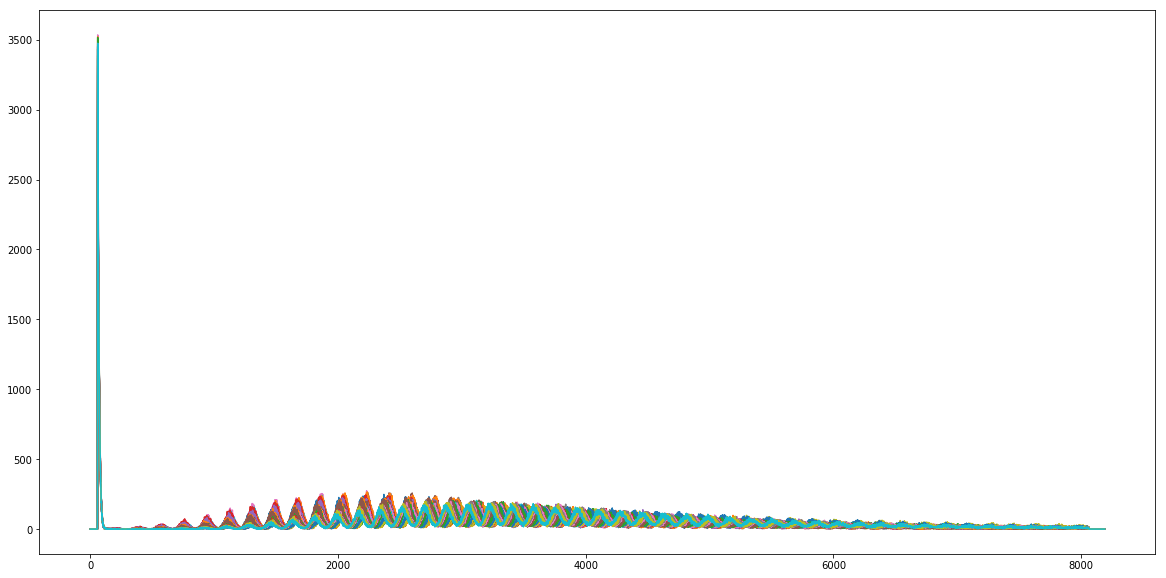

In [41]:
fig, ax = plt.subplots(figsize = (20, 10))
for col in ring:
    ax.plot(data.get(xcol), data.get(col))
plt.show()

Window_0
Average Distance: 178.04545454545453
First Peak: 181
Last Peak: 8015
Total Number of Peaks: 45
[ 181  411  573  752  933 1107 1287 1478 1664 1832 2007 2203 2371 2547
 2735 2909 3099 3271 3463 3643 3817 3988 4165 4349 4518 4712 4879 5076
 5242 5433 5608 5770 5988 6119 6316 6500 6690 6858 7020 7200 7390 7541
 7745 7876 8015]
2
['Window_0', 'Window_1', 'Window_2']
Window_0
Window_1
Window_2


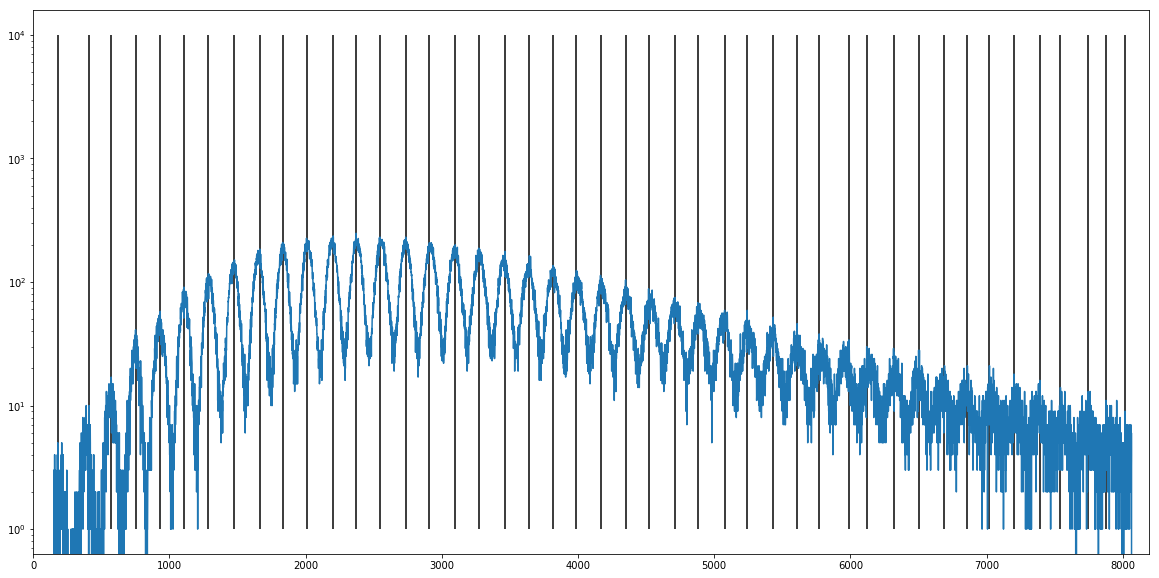

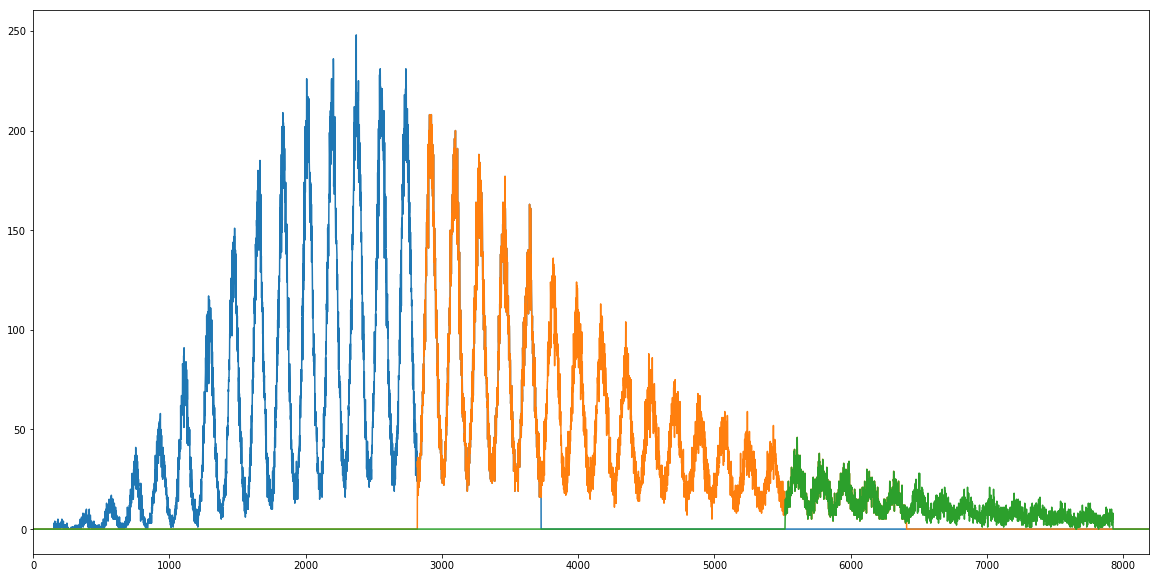

Window_1
Average Distance: 183.1860465116279
First Peak: 163
Last Peak: 8040
Total Number of Peaks: 44
[ 163  403  570  780  966 1161 1328 1508 1701 1871 2065 2256 2436 2616
 2800 2976 3169 3349 3533 3707 3899 4087 4266 4436 4635 4815 5002 5190
 5363 5541 5737 5923 6091 6283 6464 6646 6813 6983 7171 7360 7565 7739
 7904 8040]
5
['Window_0', 'Window_1', 'Window_2', 'Window_3', 'Window_4', 'Window_5']
Window_3
Window_4
Window_5


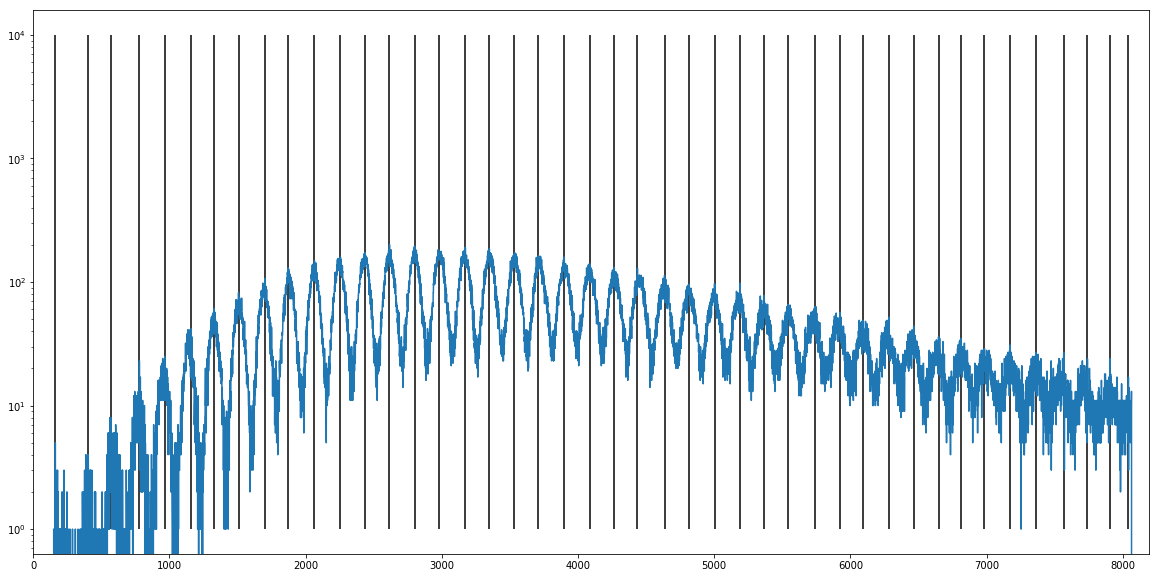

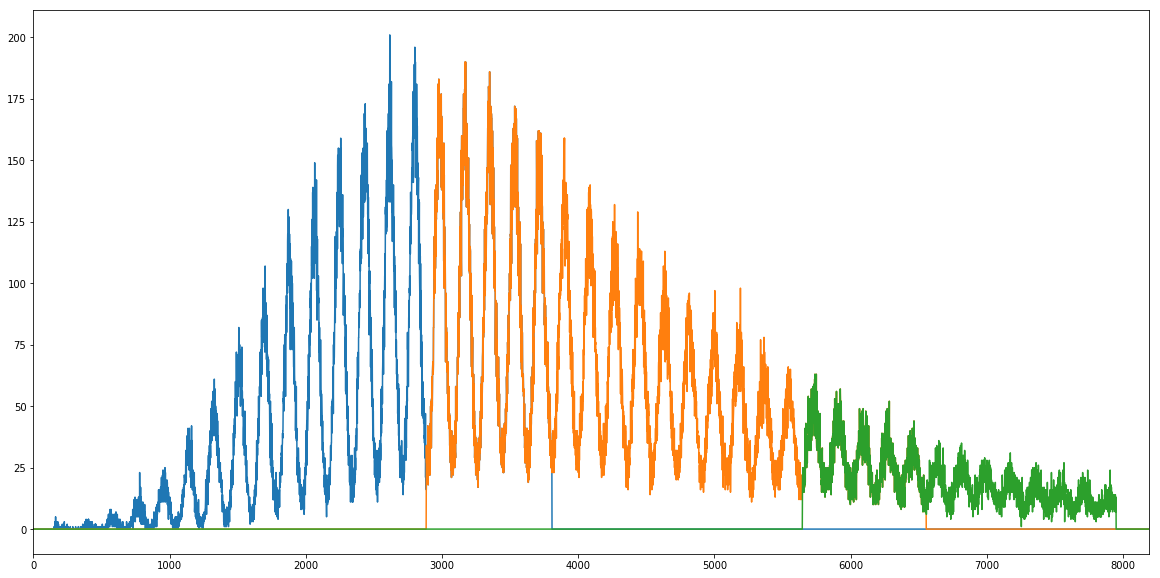

Window_10
Average Distance: 183.0
First Peak: 183
Last Peak: 8052
Total Number of Peaks: 44
[ 183  404  579  763  932 1128 1319 1487 1674 1847 2039 2236 2414 2604
 2774 2964 3140 3331 3508 3690 3866 4052 4231 4408 4587 4780 4949 5146
 5325 5486 5657 5864 6062 6247 6446 6590 6790 6952 7142 7291 7476 7661
 7840 8052]
8
['Window_0', 'Window_1', 'Window_2', 'Window_3', 'Window_4', 'Window_5', 'Window_6', 'Window_7', 'Window_8']
Window_6
Window_7
Window_8


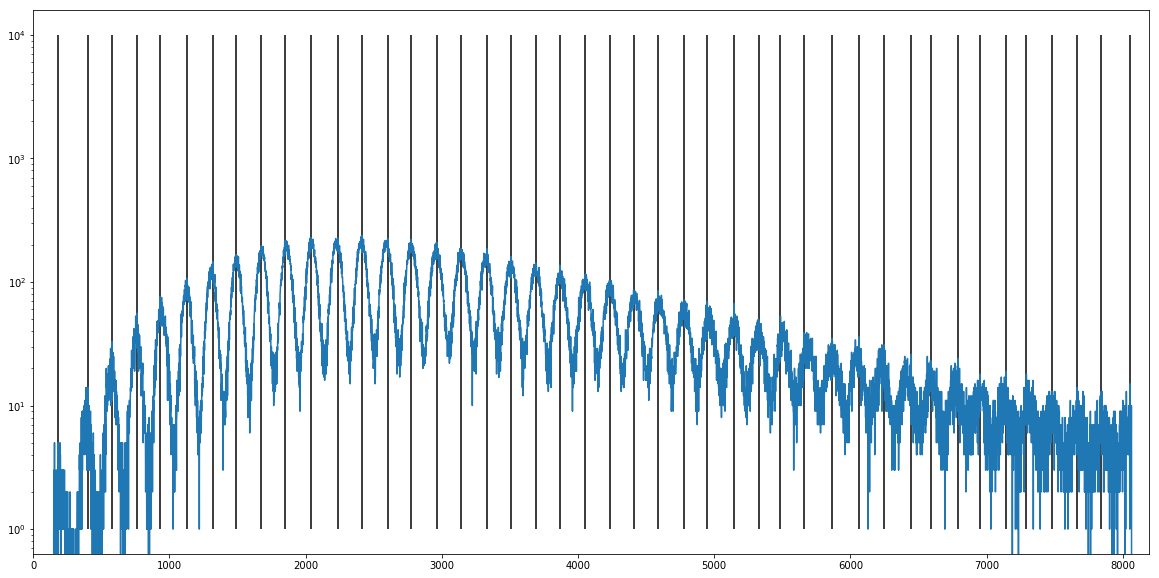

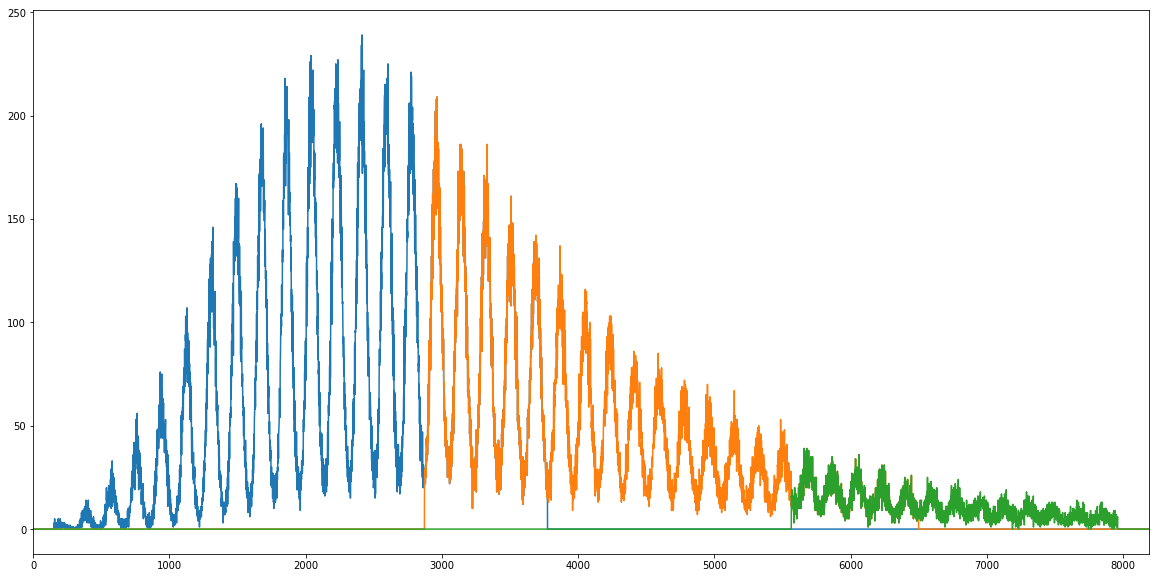

Window_11
Average Distance: 181.2325581395349
First Peak: 222
Last Peak: 8015
Total Number of Peaks: 44
[ 222  373  592  778  957 1133 1318 1497 1685 1870 2058 2238 2423 2605
 2796 2965 3136 3348 3510 3691 3877 4074 4253 4434 4591 4802 4974 5172
 5339 5527 5697 5863 6086 6239 6422 6615 6782 6965 7140 7260 7493 7691
 7844 8015]
11
['Window_0', 'Window_1', 'Window_2', 'Window_3', 'Window_4', 'Window_5', 'Window_6', 'Window_7', 'Window_8', 'Window_9', 'Window_10', 'Window_11']
Window_9
Window_10
Window_11


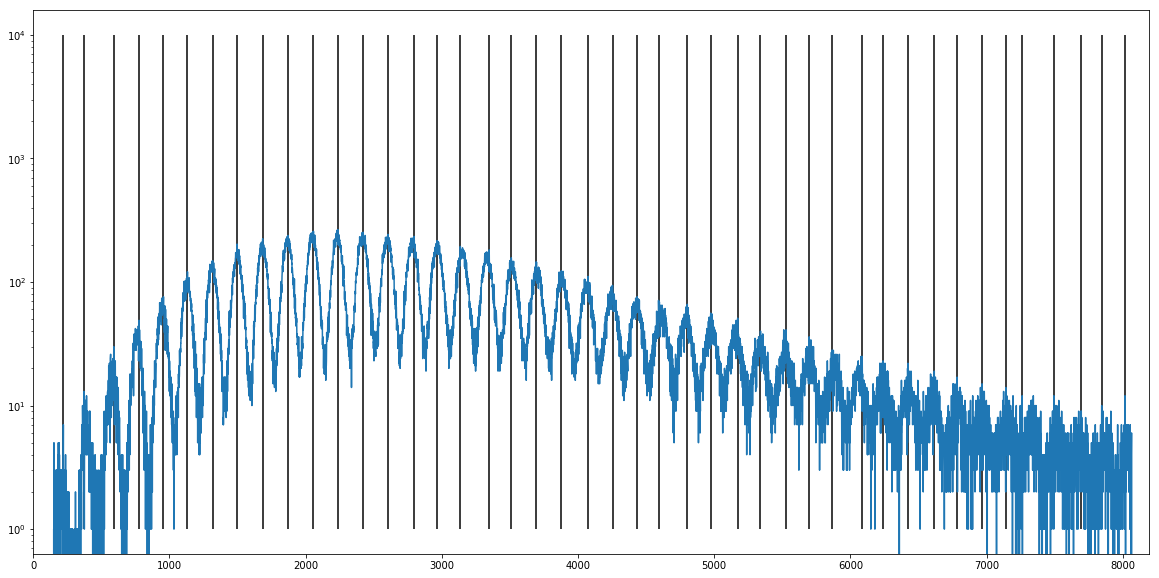

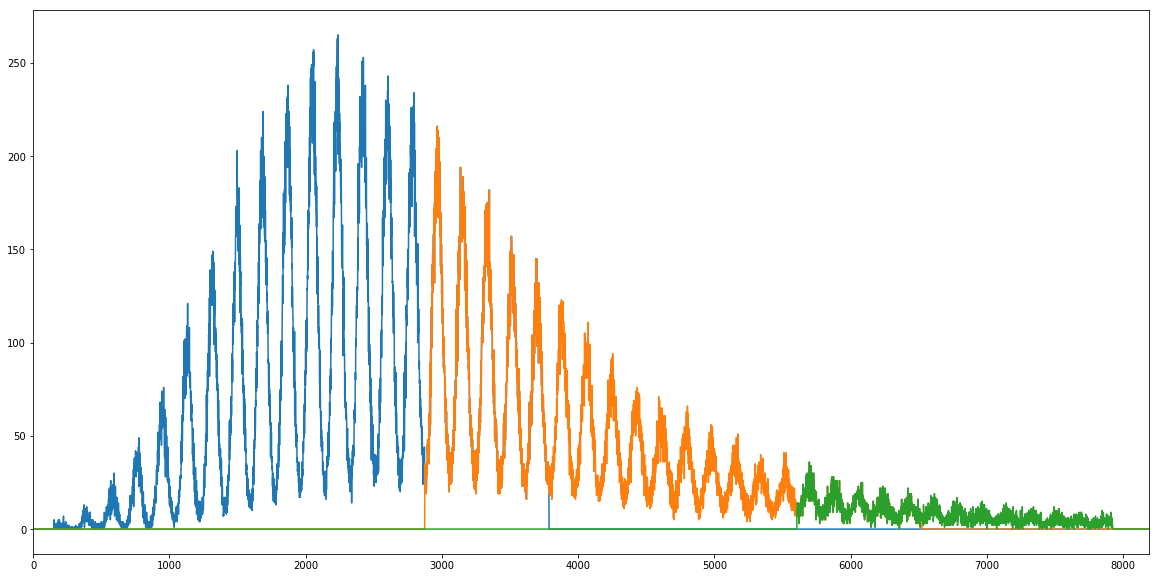

Window_12
Average Distance: 182.95348837209303
First Peak: 164
Last Peak: 8031
Total Number of Peaks: 44
[ 164  385  580  766  946 1113 1313 1485 1695 1856 2045 2233 2412 2591
 2775 2947 3128 3335 3502 3686 3874 4057 4227 4402 4592 4791 4970 5152
 5319 5503 5664 5863 6058 6220 6388 6606 6766 6943 7114 7309 7493 7640
 7808 8031]
14
['Window_0', 'Window_1', 'Window_2', 'Window_3', 'Window_4', 'Window_5', 'Window_6', 'Window_7', 'Window_8', 'Window_9', 'Window_10', 'Window_11', 'Window_12', 'Window_13', 'Window_14']
Window_12
Window_13
Window_14


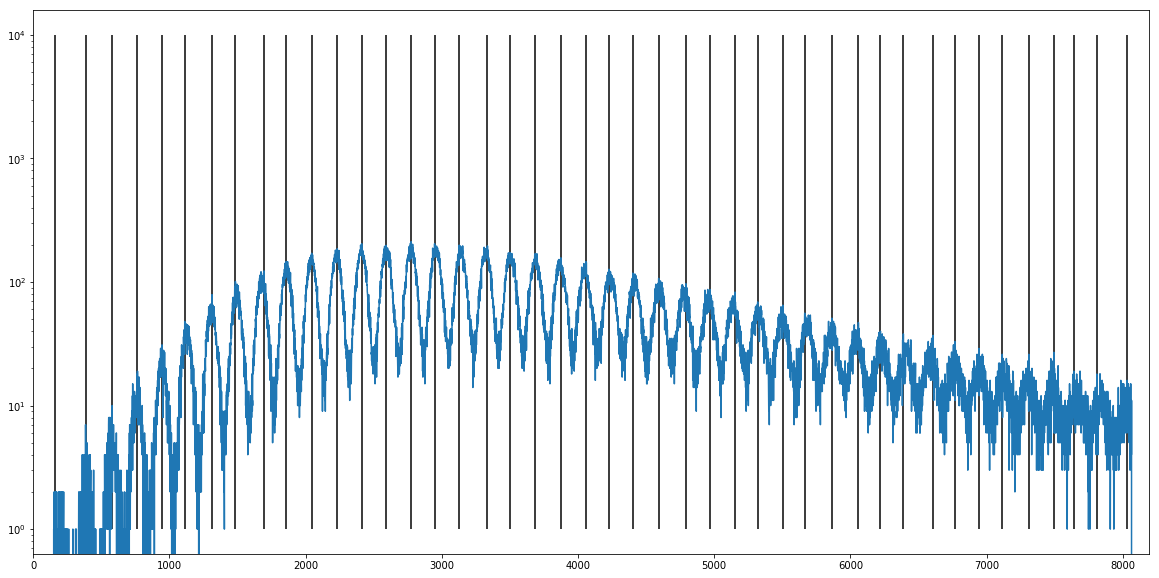

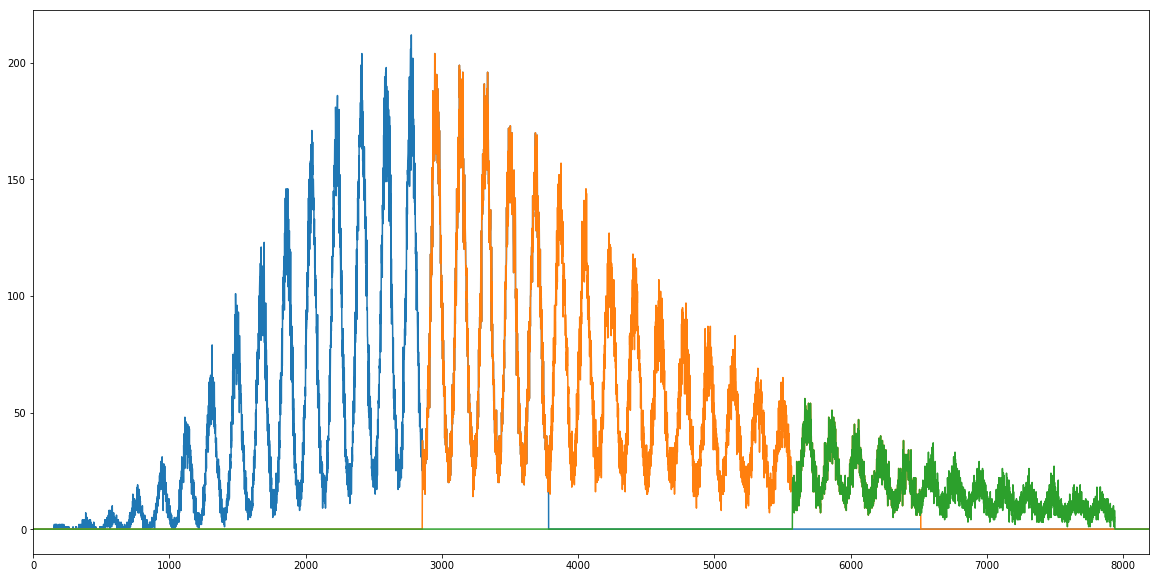

Window_13
Average Distance: 181.74418604651163
First Peak: 212
Last Peak: 8027
Total Number of Peaks: 44
[ 212  403  588  763  941 1128 1293 1494 1667 1860 2042 2226 2420 2596
 2776 2947 3143 3322 3501 3687 3858 4040 4220 4398 4592 4771 4950 5115
 5304 5517 5676 5864 6055 6230 6418 6604 6743 6908 7122 7309 7482 7652
 7836 8027]
17
['Window_0', 'Window_1', 'Window_2', 'Window_3', 'Window_4', 'Window_5', 'Window_6', 'Window_7', 'Window_8', 'Window_9', 'Window_10', 'Window_11', 'Window_12', 'Window_13', 'Window_14', 'Window_15', 'Window_16', 'Window_17']
Window_15
Window_16
Window_17


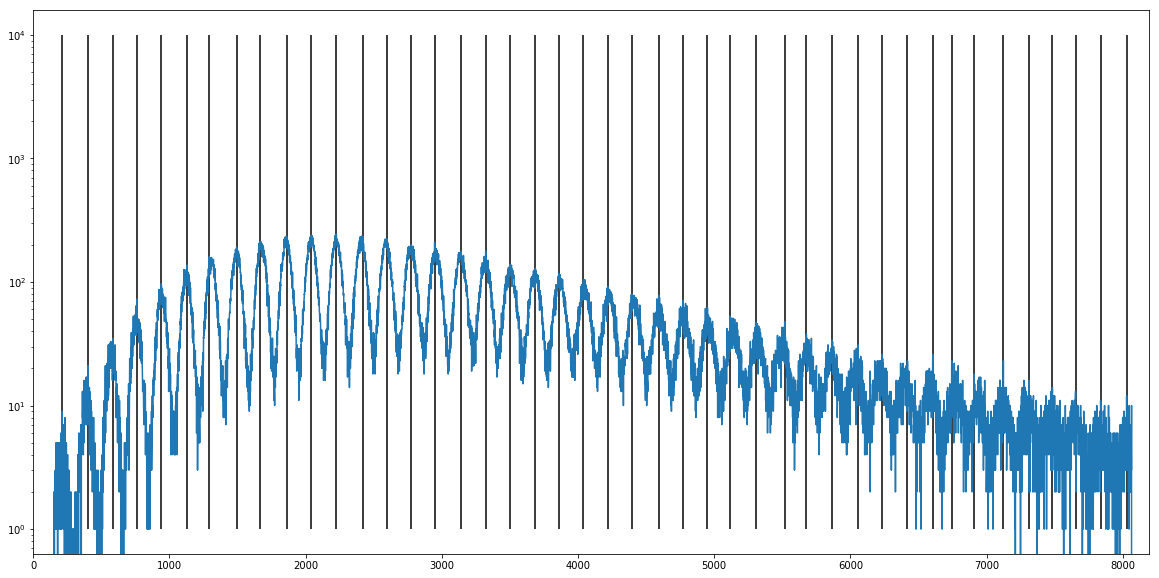

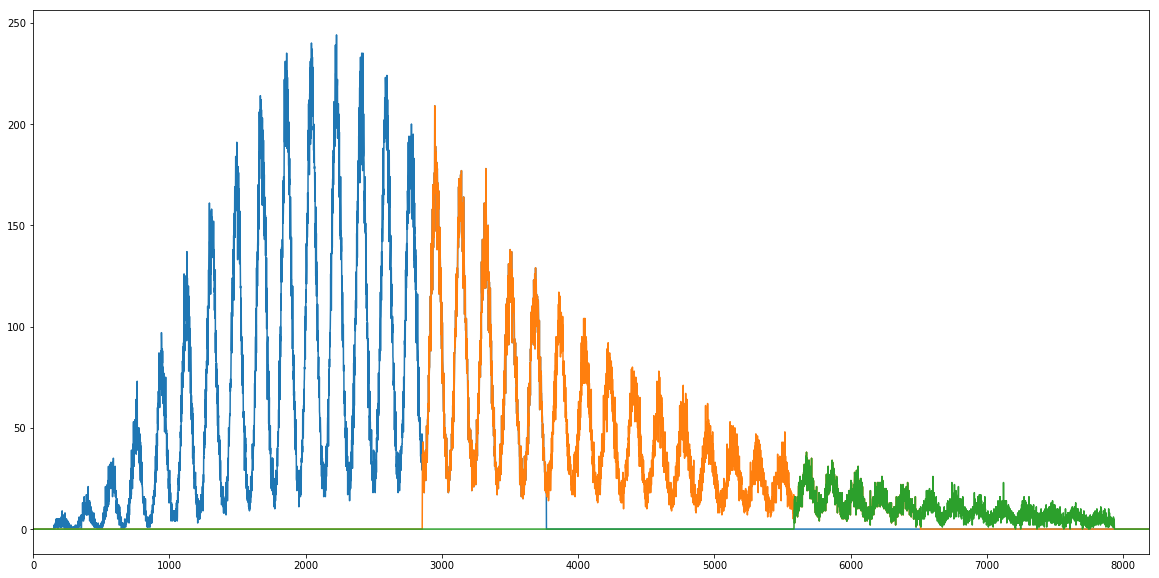

Window_14
Average Distance: 183.1627906976744
First Peak: 165
Last Peak: 8041
Total Number of Peaks: 44
[ 165  389  575  763  943 1118 1311 1485 1677 1859 2035 2230 2406 2581
 2774 2956 3143 3319 3493 3688 3858 4043 4224 4416 4599 4743 4967 5146
 5314 5501 5682 5854 6040 6216 6399 6576 6743 6977 7134 7295 7472 7672
 7828 8041]
20
['Window_0', 'Window_1', 'Window_2', 'Window_3', 'Window_4', 'Window_5', 'Window_6', 'Window_7', 'Window_8', 'Window_9', 'Window_10', 'Window_11', 'Window_12', 'Window_13', 'Window_14', 'Window_15', 'Window_16', 'Window_17', 'Window_18', 'Window_19', 'Window_20']
Window_18
Window_19
Window_20


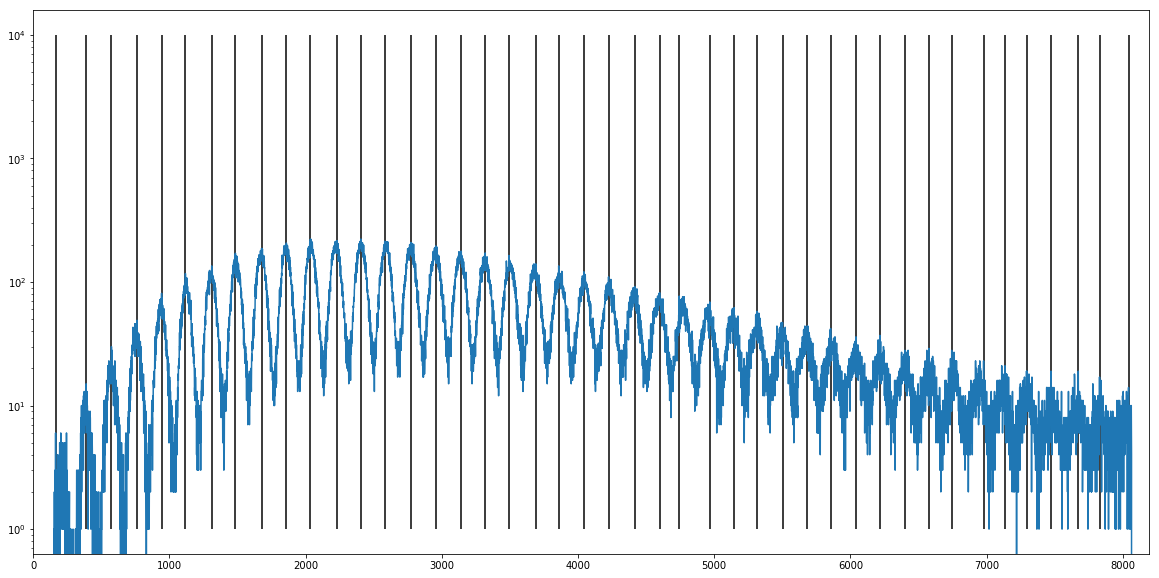

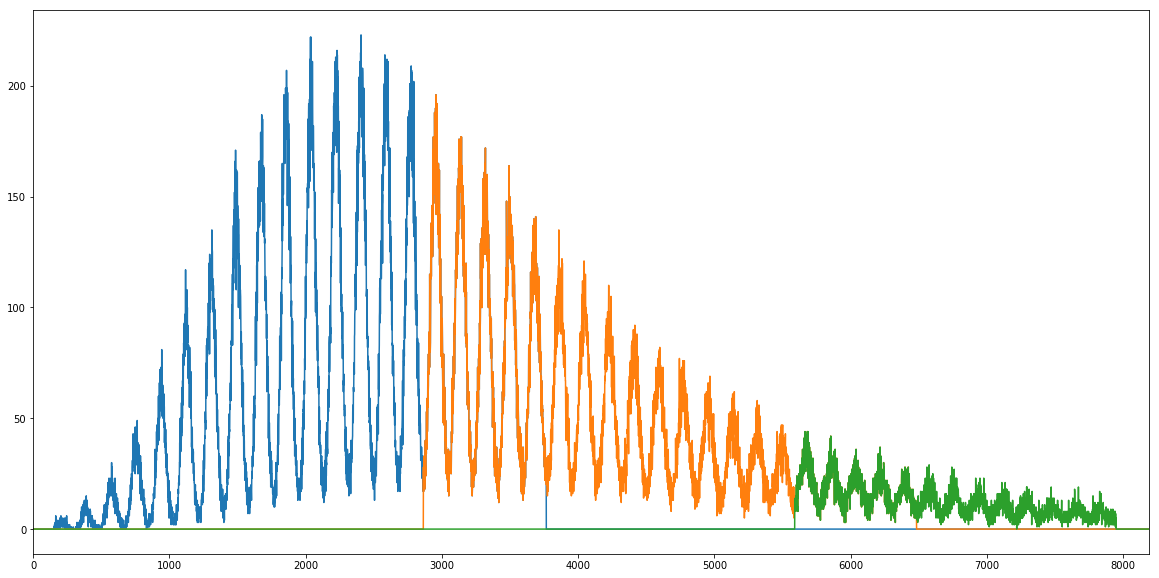

Window_15
Average Distance: 180.90697674418604
First Peak: 212
Last Peak: 7991
Total Number of Peaks: 44
[ 212  387  565  765  938 1121 1305 1502 1672 1863 2048 2239 2406 2589
 2775 2947 3142 3307 3504 3670 3871 4053 4243 4405 4593 4757 4946 5132
 5333 5504 5686 5844 6039 6224 6390 6581 6758 6927 7118 7273 7476 7677
 7850 7991]
23
['Window_0', 'Window_1', 'Window_2', 'Window_3', 'Window_4', 'Window_5', 'Window_6', 'Window_7', 'Window_8', 'Window_9', 'Window_10', 'Window_11', 'Window_12', 'Window_13', 'Window_14', 'Window_15', 'Window_16', 'Window_17', 'Window_18', 'Window_19', 'Window_20', 'Window_21', 'Window_22', 'Window_23']
Window_21
Window_22
Window_23


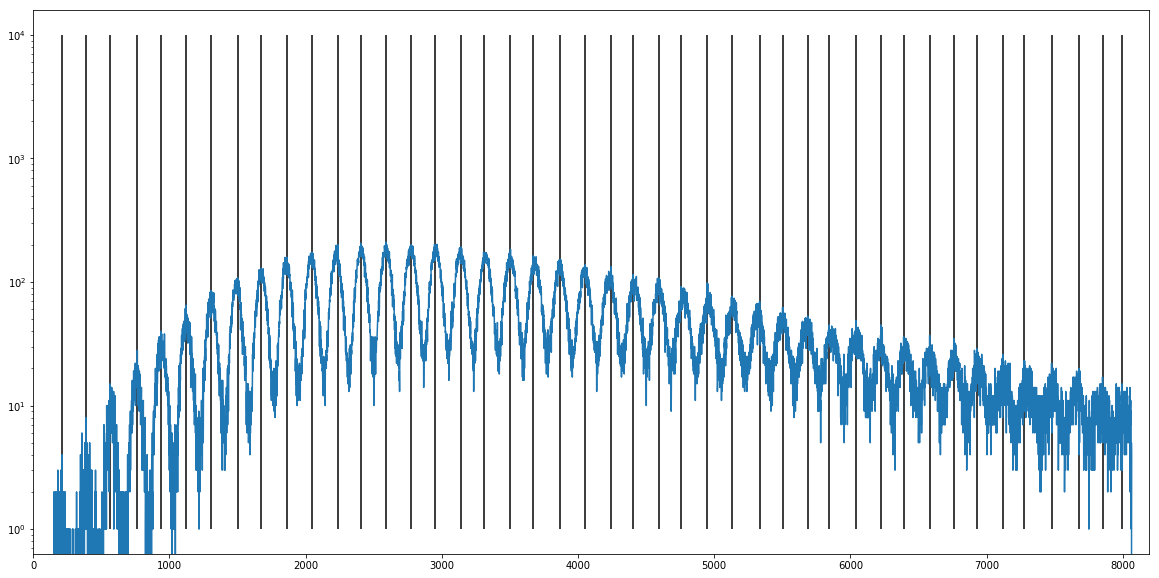

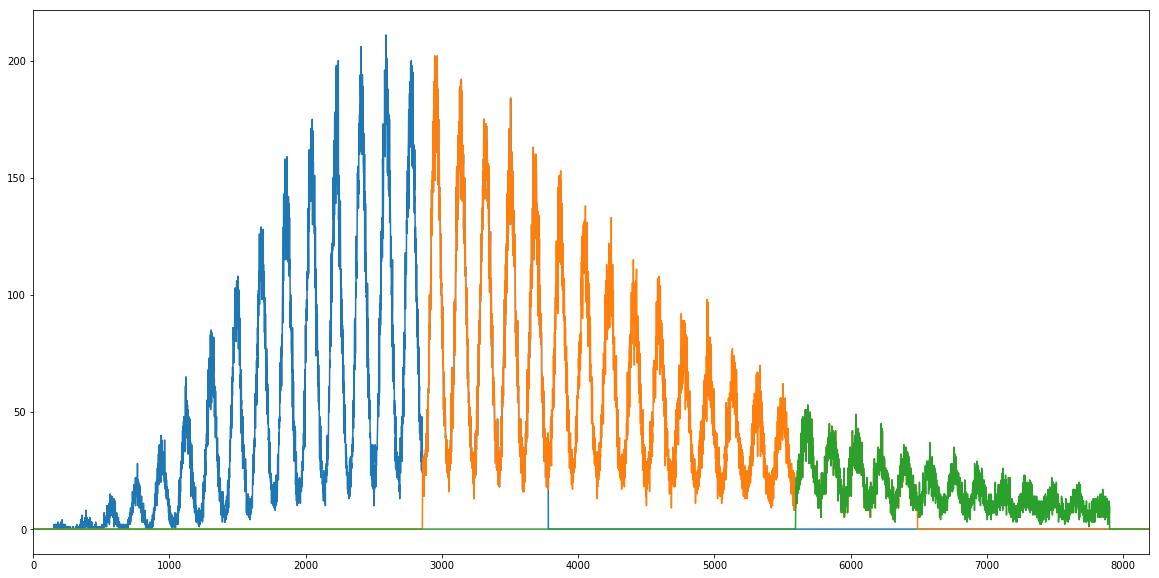

Window_16
Average Distance: 182.0
First Peak: 154
Last Peak: 7980
Total Number of Peaks: 44
[ 154  385  580  769  942 1134 1327 1505 1691 1860 2039 2214 2406 2597
 2758 2961 3136 3316 3500 3670 3852 4034 4207 4405 4591 4771 4931 5124
 5321 5517 5664 5843 6056 6215 6380 6554 6739 6927 7117 7305 7491 7656
 7830 7980]
26
['Window_0', 'Window_1', 'Window_2', 'Window_3', 'Window_4', 'Window_5', 'Window_6', 'Window_7', 'Window_8', 'Window_9', 'Window_10', 'Window_11', 'Window_12', 'Window_13', 'Window_14', 'Window_15', 'Window_16', 'Window_17', 'Window_18', 'Window_19', 'Window_20', 'Window_21', 'Window_22', 'Window_23', 'Window_24', 'Window_25', 'Window_26']
Window_24
Window_25
Window_26


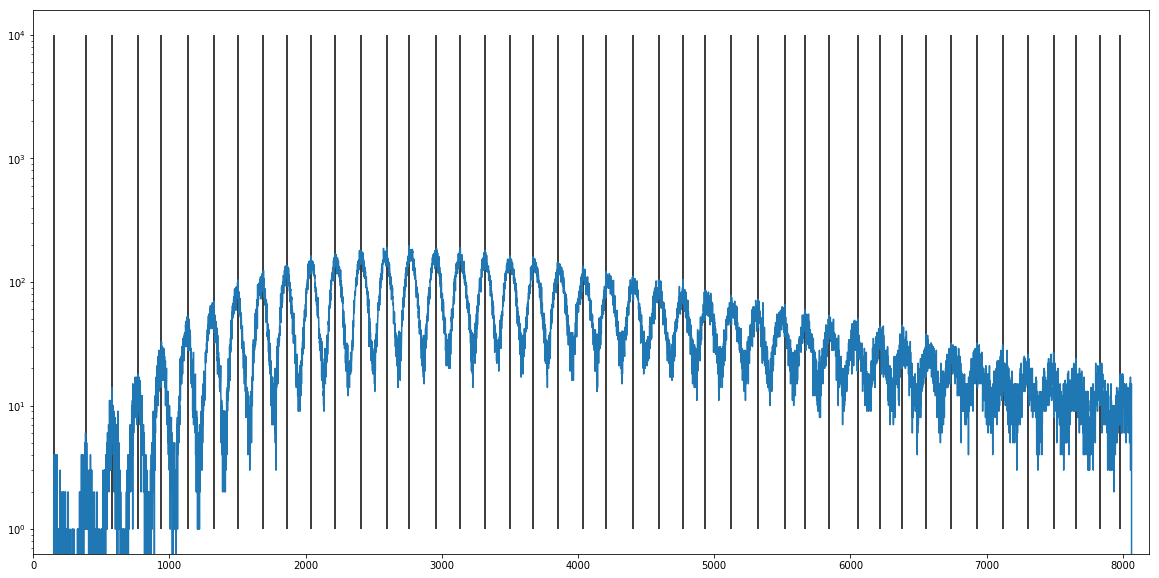

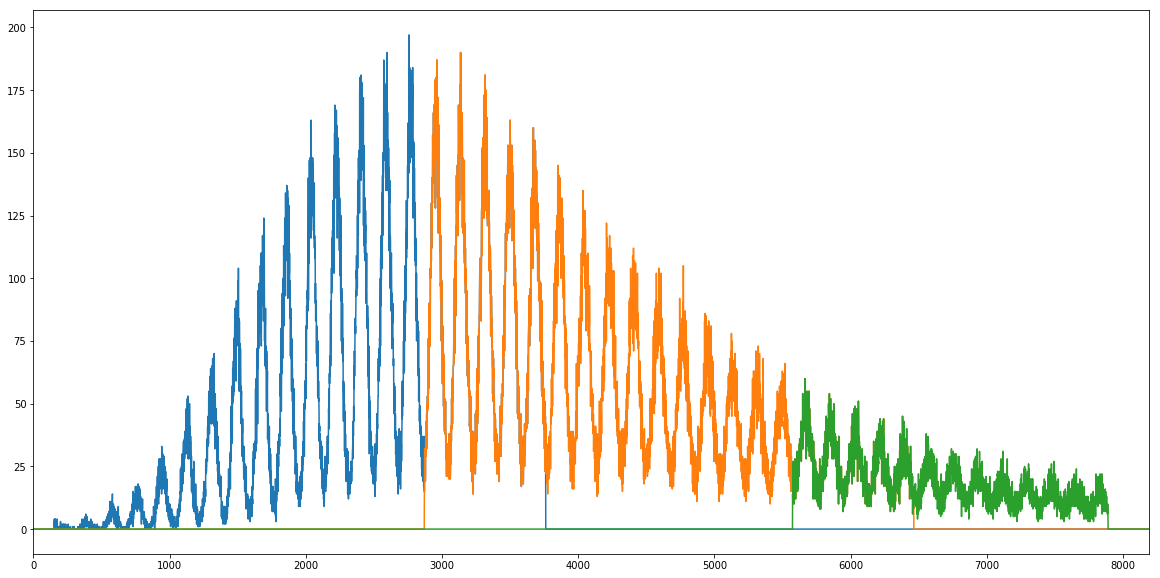

Window_17
Average Distance: 181.27906976744185
First Peak: 163
Last Peak: 7958
Total Number of Peaks: 44
[ 163  395  563  758  945 1119 1305 1474 1659 1837 2028 2211 2402 2572
 2764 2940 3119 3293 3490 3641 3839 4020 4195 4359 4541 4739 4928 5080
 5295 5456 5640 5805 6000 6178 6366 6555 6716 6898 7072 7253 7434 7625
 7795 7958]
29
['Window_0', 'Window_1', 'Window_2', 'Window_3', 'Window_4', 'Window_5', 'Window_6', 'Window_7', 'Window_8', 'Window_9', 'Window_10', 'Window_11', 'Window_12', 'Window_13', 'Window_14', 'Window_15', 'Window_16', 'Window_17', 'Window_18', 'Window_19', 'Window_20', 'Window_21', 'Window_22', 'Window_23', 'Window_24', 'Window_25', 'Window_26', 'Window_27', 'Window_28', 'Window_29']
Window_27
Window_28
Window_29


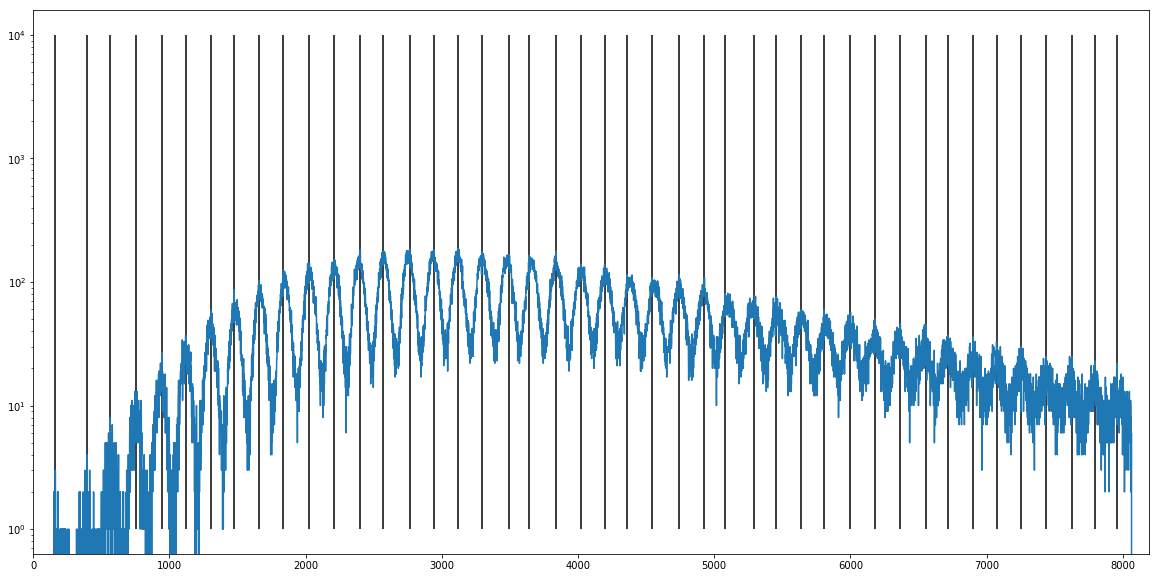

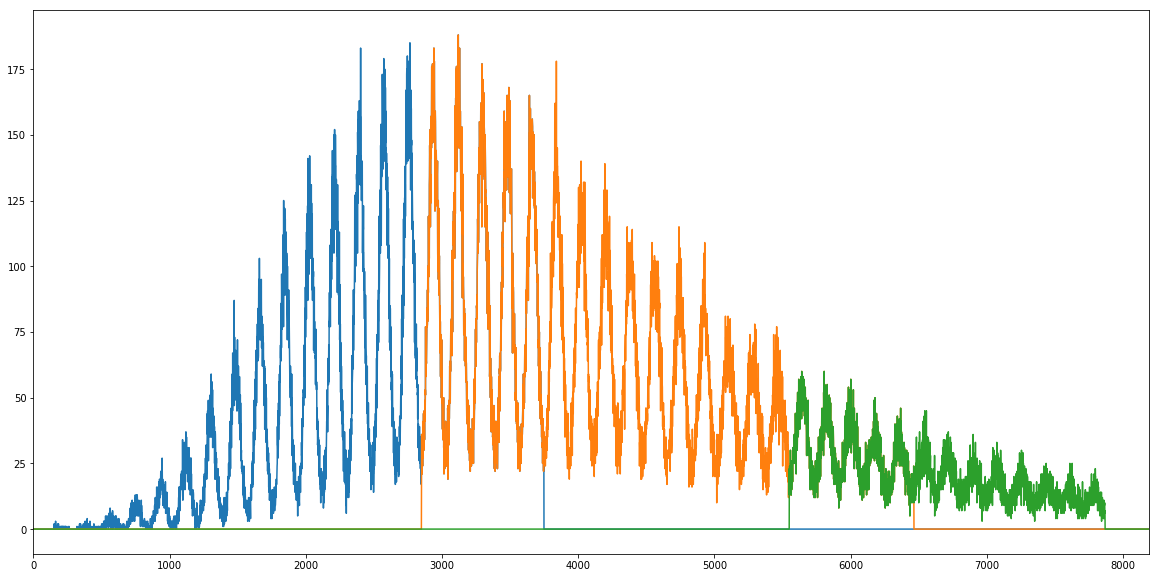

Window_18
Average Distance: 181.72093023255815
First Peak: 174
Last Peak: 7988
Total Number of Peaks: 44
[ 174  387  582  780  959 1124 1304 1503 1671 1870 2034 2216 2406 2595
 2763 2953 3128 3305 3498 3671 3846 4022 4197 4409 4572 4767 4926 5120
 5299 5481 5653 5836 6005 6196 6394 6540 6755 6920 7095 7280 7460 7630
 7822 7988]
32
['Window_0', 'Window_1', 'Window_2', 'Window_3', 'Window_4', 'Window_5', 'Window_6', 'Window_7', 'Window_8', 'Window_9', 'Window_10', 'Window_11', 'Window_12', 'Window_13', 'Window_14', 'Window_15', 'Window_16', 'Window_17', 'Window_18', 'Window_19', 'Window_20', 'Window_21', 'Window_22', 'Window_23', 'Window_24', 'Window_25', 'Window_26', 'Window_27', 'Window_28', 'Window_29', 'Window_30', 'Window_31', 'Window_32']
Window_30
Window_31
Window_32


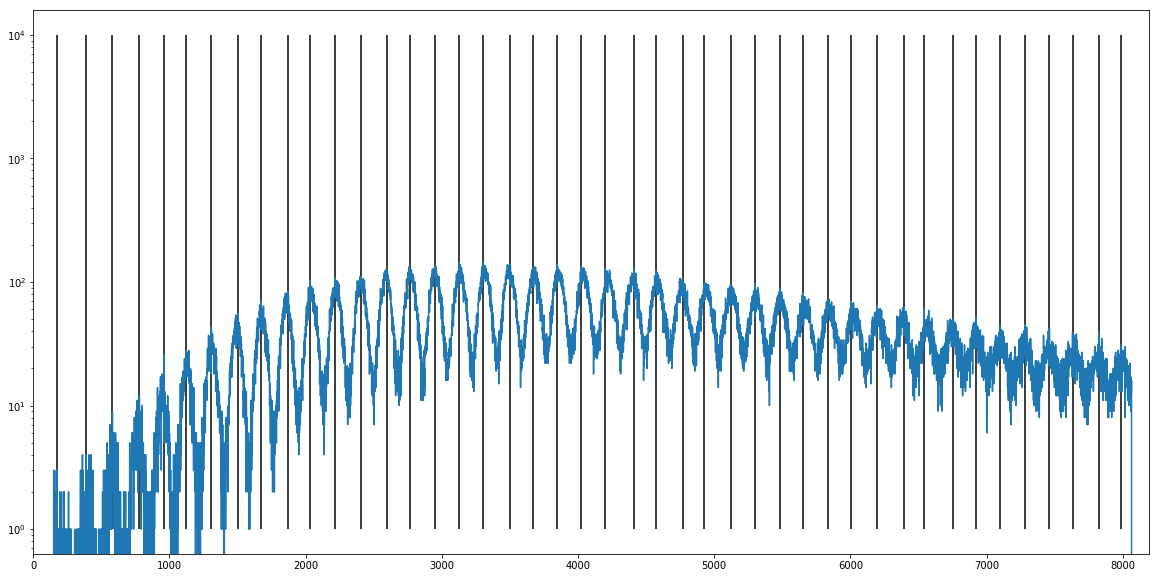

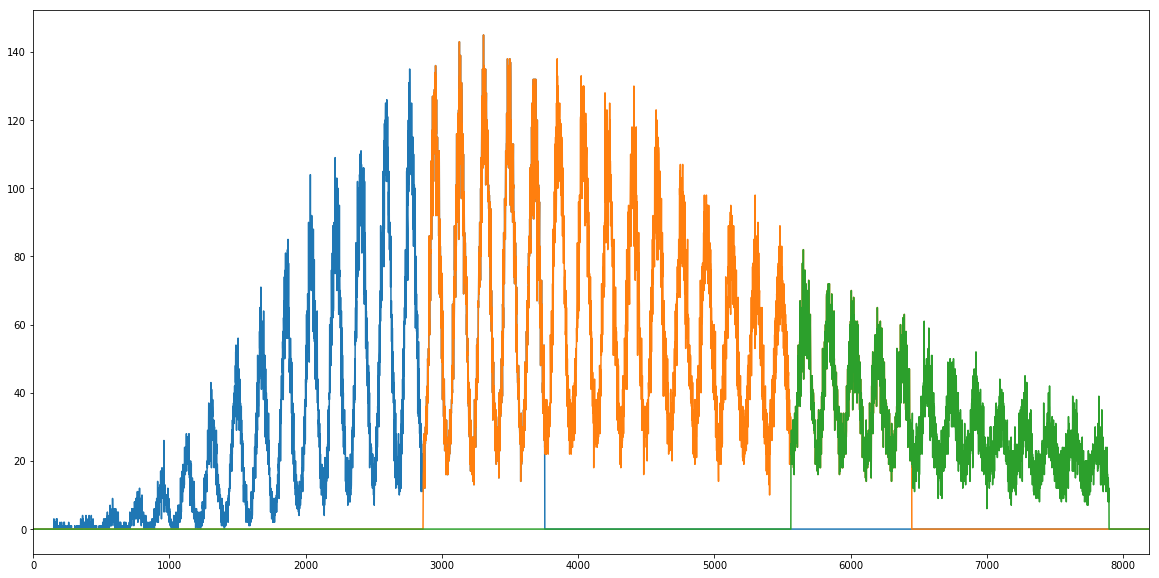

Window_19
Average Distance: 181.48837209302326
First Peak: 174
Last Peak: 7978
Total Number of Peaks: 44
[ 174  400  578  736  939 1123 1293 1476 1663 1851 2029 2209 2389 2567
 2740 2924 3119 3287 3483 3663 3836 4011 4205 4382 4565 4729 4919 5111
 5293 5452 5634 5819 6003 6183 6343 6533 6702 6890 7078 7239 7411 7605
 7772 7978]
35
['Window_0', 'Window_1', 'Window_2', 'Window_3', 'Window_4', 'Window_5', 'Window_6', 'Window_7', 'Window_8', 'Window_9', 'Window_10', 'Window_11', 'Window_12', 'Window_13', 'Window_14', 'Window_15', 'Window_16', 'Window_17', 'Window_18', 'Window_19', 'Window_20', 'Window_21', 'Window_22', 'Window_23', 'Window_24', 'Window_25', 'Window_26', 'Window_27', 'Window_28', 'Window_29', 'Window_30', 'Window_31', 'Window_32', 'Window_33', 'Window_34', 'Window_35']
Window_33
Window_34
Window_35


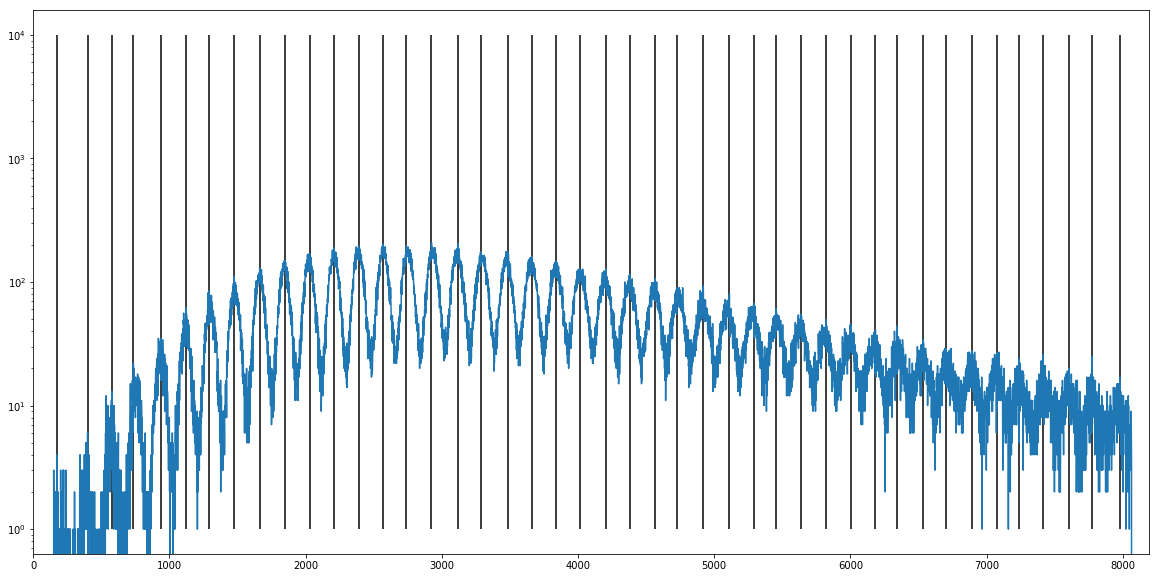

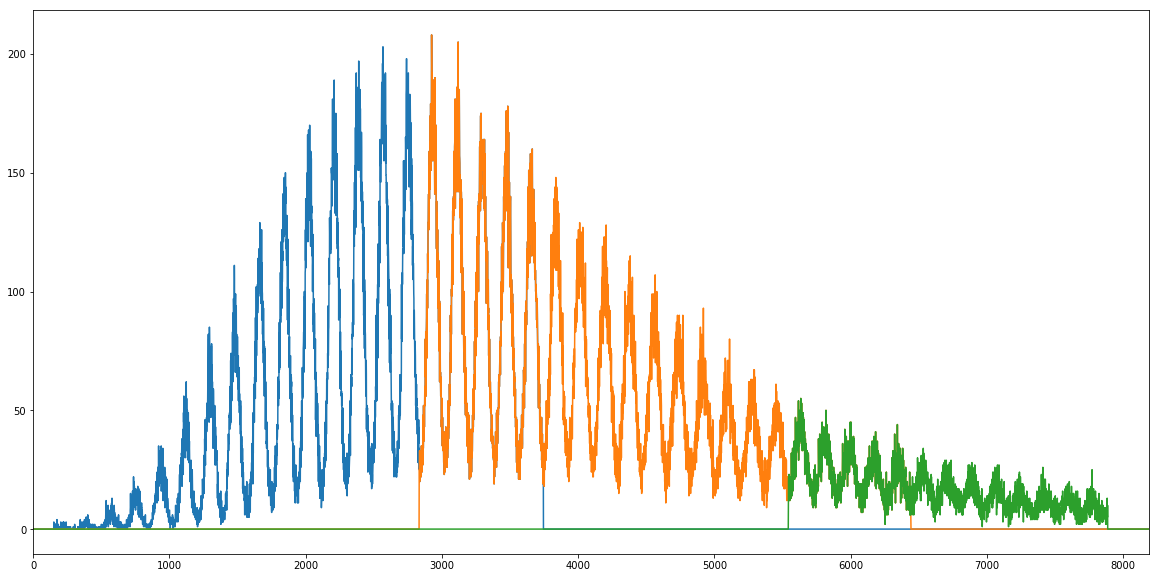

Window_2
Average Distance: 178.9090909090909
First Peak: 172
Last Peak: 8044
Total Number of Peaks: 45
[ 172  424  594  778  952 1116 1327 1504 1686 1878 2063 2237 2431 2632
 2797 2963 3176 3348 3544 3732 3925 4095 4297 4473 4624 4830 4985 5184
 5391 5546 5735 5906 6107 6291 6470 6656 6842 7001 7167 7327 7502 7623
 7758 7924 8044]
38
['Window_0', 'Window_1', 'Window_2', 'Window_3', 'Window_4', 'Window_5', 'Window_6', 'Window_7', 'Window_8', 'Window_9', 'Window_10', 'Window_11', 'Window_12', 'Window_13', 'Window_14', 'Window_15', 'Window_16', 'Window_17', 'Window_18', 'Window_19', 'Window_20', 'Window_21', 'Window_22', 'Window_23', 'Window_24', 'Window_25', 'Window_26', 'Window_27', 'Window_28', 'Window_29', 'Window_30', 'Window_31', 'Window_32', 'Window_33', 'Window_34', 'Window_35', 'Window_36', 'Window_37', 'Window_38']
Window_36
Window_37
Window_38


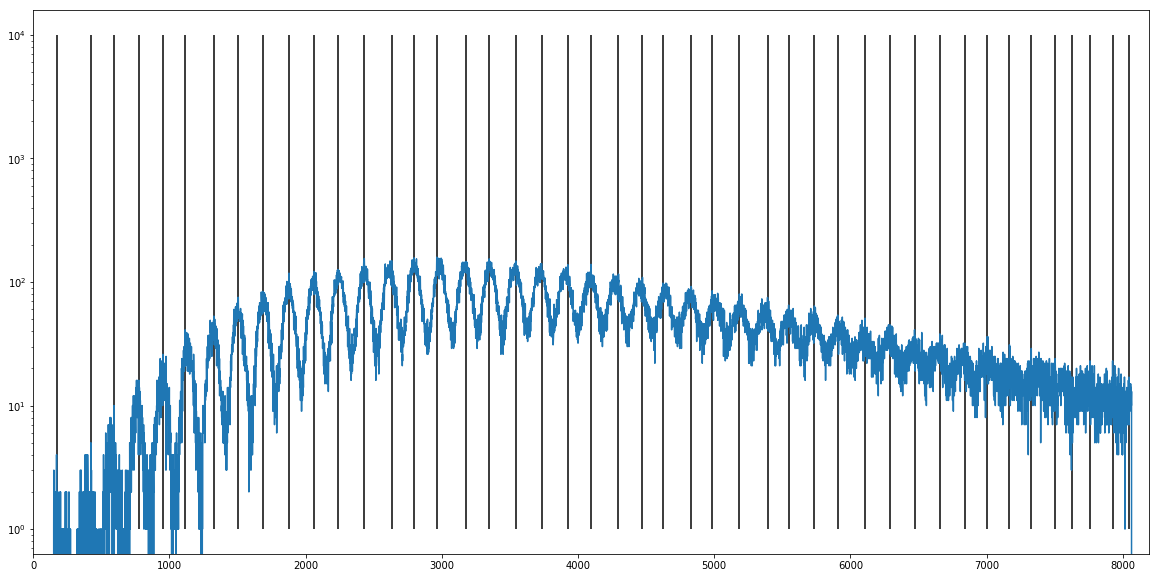

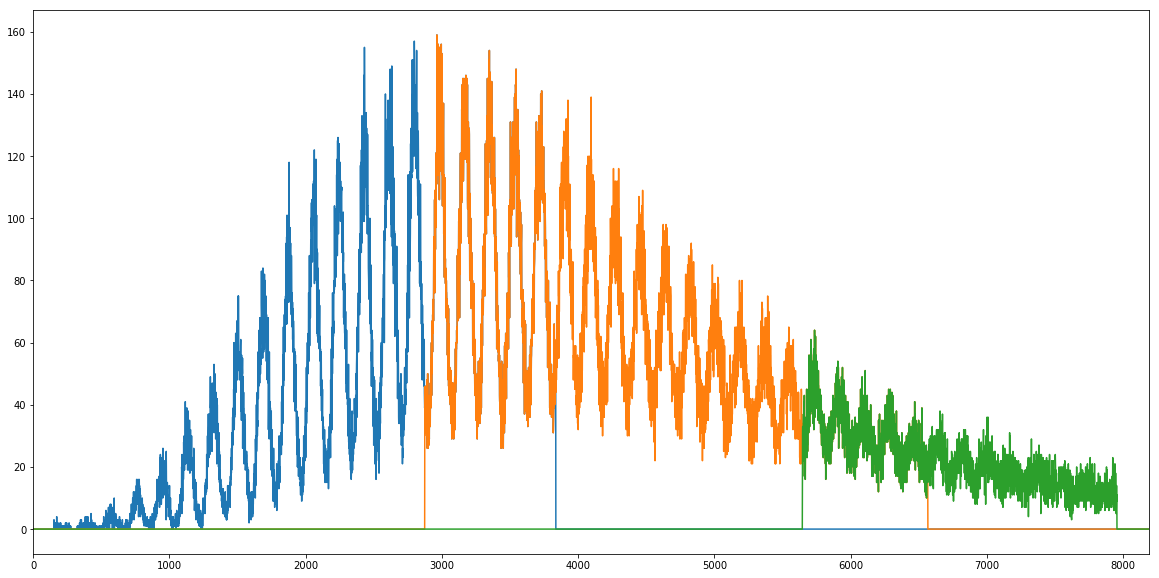

Window_20
Average Distance: 180.48837209302326
First Peak: 218
Last Peak: 7979
Total Number of Peaks: 44
[ 218  394  551  752  947 1111 1311 1490 1663 1841 2030 2221 2394 2581
 2765 2949 3119 3307 3483 3669 3855 4025 4215 4399 4568 4758 4913 5105
 5281 5486 5634 5829 5976 6195 6371 6561 6736 6908 7075 7279 7456 7598
 7807 7979]
41
['Window_0', 'Window_1', 'Window_2', 'Window_3', 'Window_4', 'Window_5', 'Window_6', 'Window_7', 'Window_8', 'Window_9', 'Window_10', 'Window_11', 'Window_12', 'Window_13', 'Window_14', 'Window_15', 'Window_16', 'Window_17', 'Window_18', 'Window_19', 'Window_20', 'Window_21', 'Window_22', 'Window_23', 'Window_24', 'Window_25', 'Window_26', 'Window_27', 'Window_28', 'Window_29', 'Window_30', 'Window_31', 'Window_32', 'Window_33', 'Window_34', 'Window_35', 'Window_36', 'Window_37', 'Window_38', 'Window_39', 'Window_40', 'Window_41']
Window_39
Window_40
Window_41


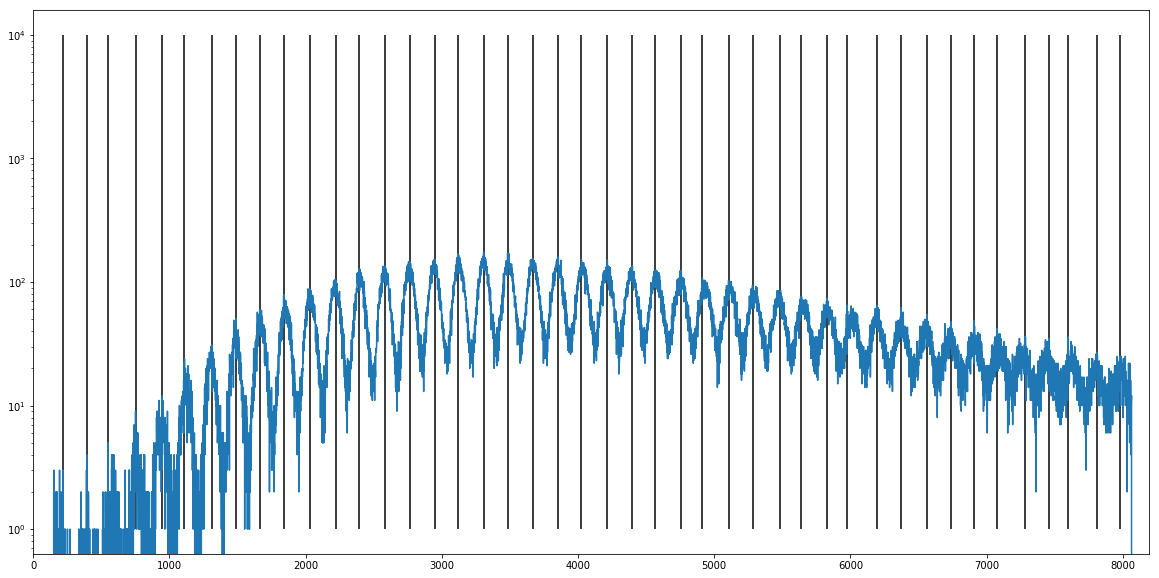

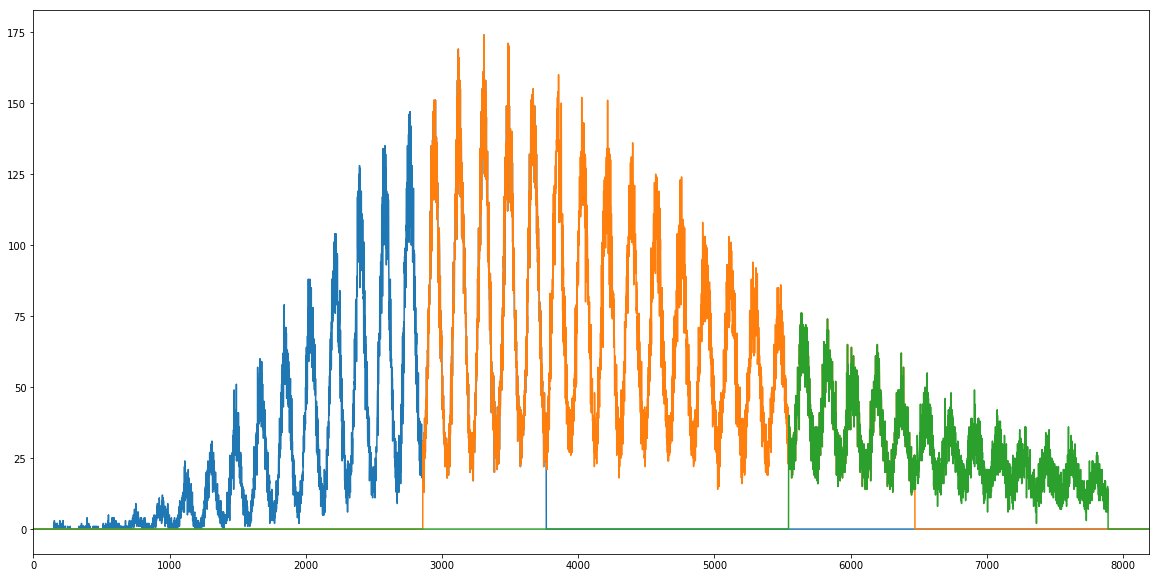

Window_21
Average Distance: 178.70454545454547
First Peak: 158
Last Peak: 8021
Total Number of Peaks: 45
[ 158  377  591  742  916 1109 1290 1476 1647 1830 2025 2195 2379 2571
 2732 2936 3098 3282 3454 3634 3809 4006 4173 4372 4523 4739 4888 5093
 5247 5460 5597 5794 5980 6152 6323 6495 6668 6866 7054 7190 7407 7571
 7761 7894 8021]
44
['Window_0', 'Window_1', 'Window_2', 'Window_3', 'Window_4', 'Window_5', 'Window_6', 'Window_7', 'Window_8', 'Window_9', 'Window_10', 'Window_11', 'Window_12', 'Window_13', 'Window_14', 'Window_15', 'Window_16', 'Window_17', 'Window_18', 'Window_19', 'Window_20', 'Window_21', 'Window_22', 'Window_23', 'Window_24', 'Window_25', 'Window_26', 'Window_27', 'Window_28', 'Window_29', 'Window_30', 'Window_31', 'Window_32', 'Window_33', 'Window_34', 'Window_35', 'Window_36', 'Window_37', 'Window_38', 'Window_39', 'Window_40', 'Window_41', 'Window_42', 'Window_43', 'Window_44']
Window_42
Window_43
Window_44


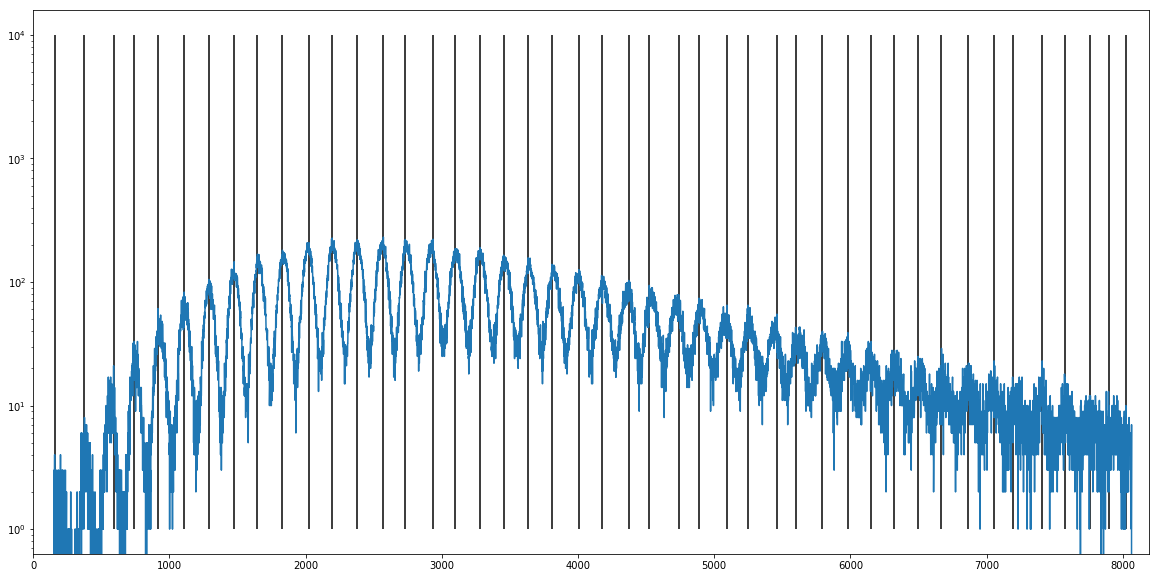

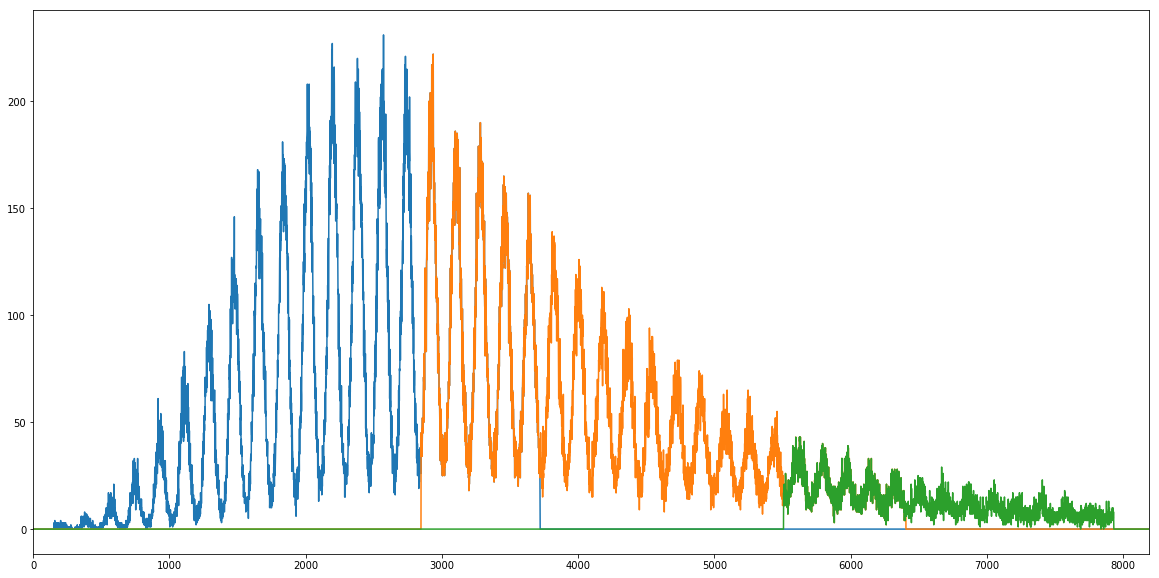

Window_22
Average Distance: 179.3181818181818
First Peak: 163
Last Peak: 8053
Total Number of Peaks: 45
[ 163  405  572  751  922 1118 1299 1481 1649 1841 2018 2206 2382 2569
 2747 2929 3114 3285 3454 3641 3821 4024 4173 4376 4540 4718 4893 5099
 5278 5460 5620 5819 5990 6147 6338 6512 6716 6891 7056 7228 7437 7575
 7728 7924 8053]
47
['Window_0', 'Window_1', 'Window_2', 'Window_3', 'Window_4', 'Window_5', 'Window_6', 'Window_7', 'Window_8', 'Window_9', 'Window_10', 'Window_11', 'Window_12', 'Window_13', 'Window_14', 'Window_15', 'Window_16', 'Window_17', 'Window_18', 'Window_19', 'Window_20', 'Window_21', 'Window_22', 'Window_23', 'Window_24', 'Window_25', 'Window_26', 'Window_27', 'Window_28', 'Window_29', 'Window_30', 'Window_31', 'Window_32', 'Window_33', 'Window_34', 'Window_35', 'Window_36', 'Window_37', 'Window_38', 'Window_39', 'Window_40', 'Window_41', 'Window_42', 'Window_43', 'Window_44', 'Window_45', 'Window_46', 'Window_47']
Window_45
Window_46
Window_47


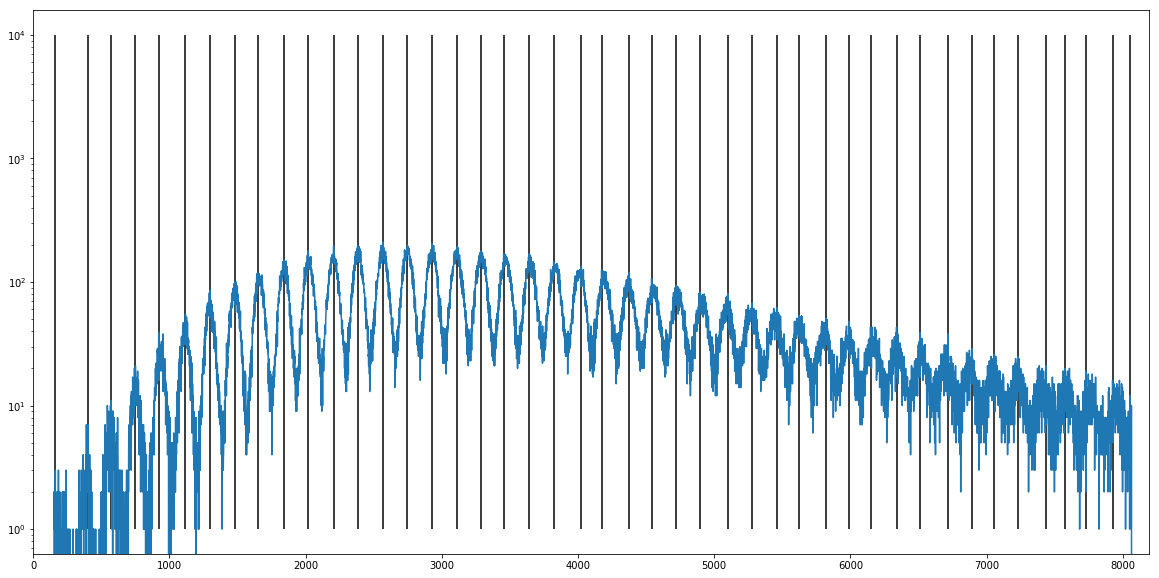

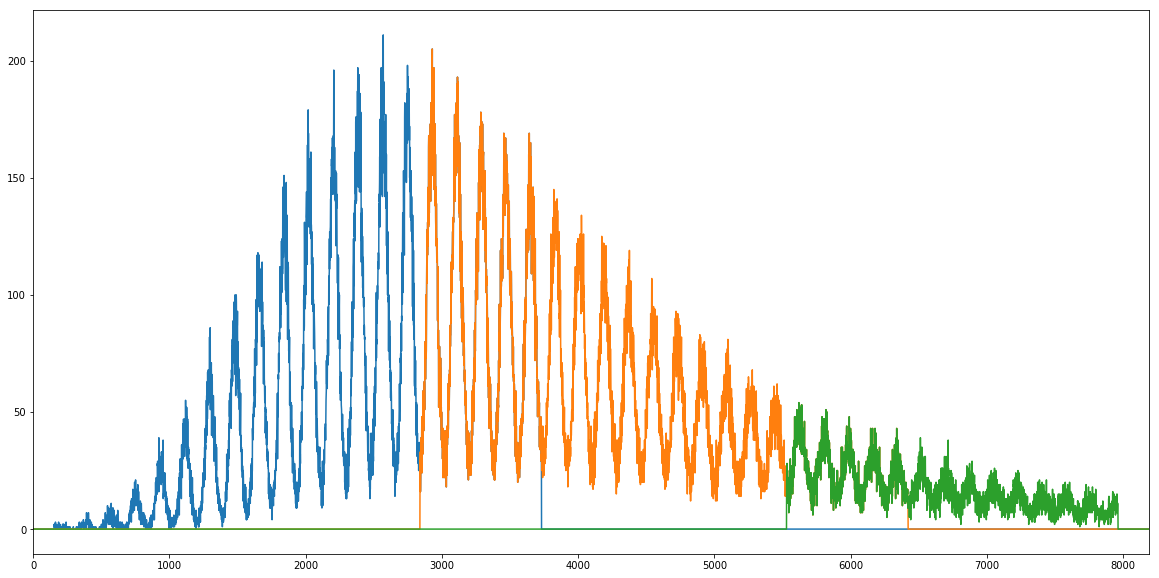

Window_23
Average Distance: 179.5
First Peak: 157
Last Peak: 8055
Total Number of Peaks: 45
[ 157  376  565  757  933 1123 1303 1470 1644 1842 2013 2183 2361 2551
 2717 2907 3086 3260 3436 3628 3804 3996 4167 4329 4513 4695 4869 5060
 5230 5397 5589 5742 5913 6116 6276 6448 6643 6823 7031 7176 7346 7493
 7706 7871 8055]
50
['Window_0', 'Window_1', 'Window_2', 'Window_3', 'Window_4', 'Window_5', 'Window_6', 'Window_7', 'Window_8', 'Window_9', 'Window_10', 'Window_11', 'Window_12', 'Window_13', 'Window_14', 'Window_15', 'Window_16', 'Window_17', 'Window_18', 'Window_19', 'Window_20', 'Window_21', 'Window_22', 'Window_23', 'Window_24', 'Window_25', 'Window_26', 'Window_27', 'Window_28', 'Window_29', 'Window_30', 'Window_31', 'Window_32', 'Window_33', 'Window_34', 'Window_35', 'Window_36', 'Window_37', 'Window_38', 'Window_39', 'Window_40', 'Window_41', 'Window_42', 'Window_43', 'Window_44', 'Window_45', 'Window_46', 'Window_47', 'Window_48', 'Window_49', 'Window_50']
Window_48
Window_49
W

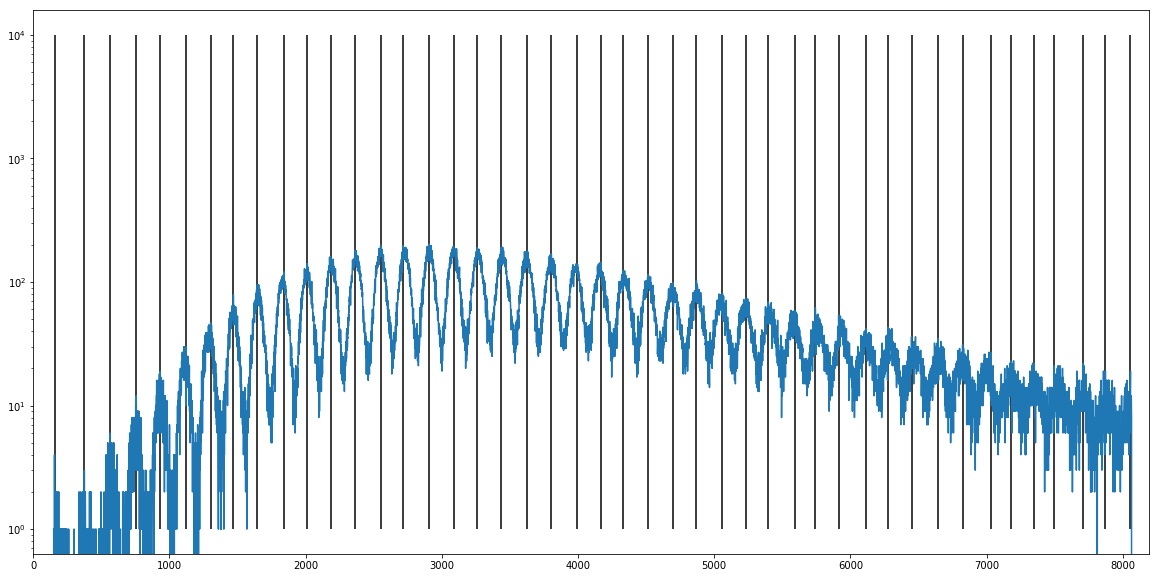

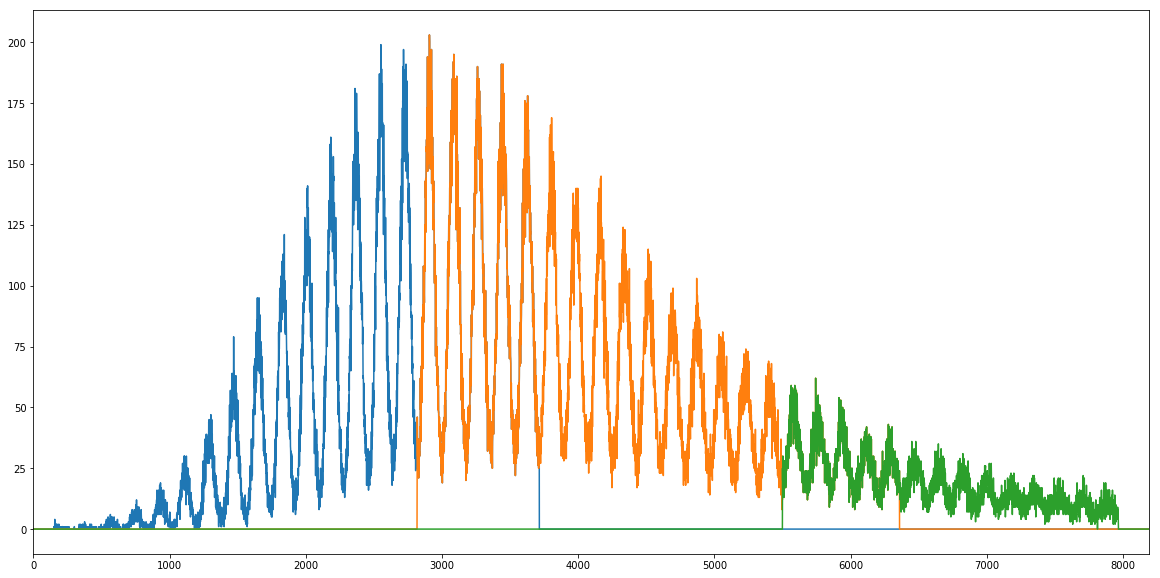

Window_24
Average Distance: 177.88636363636363
First Peak: 151
Last Peak: 7978
Total Number of Peaks: 45
[ 151  373  539  749  921 1085 1282 1444 1628 1815 1999 2178 2343 2529
 2698 2891 3070 3241 3407 3585 3761 3928 4121 4302 4462 4642 4833 5006
 5148 5355 5511 5722 5886 6043 6253 6402 6574 6764 6930 7092 7262 7465
 7615 7774 7978]
53
['Window_0', 'Window_1', 'Window_2', 'Window_3', 'Window_4', 'Window_5', 'Window_6', 'Window_7', 'Window_8', 'Window_9', 'Window_10', 'Window_11', 'Window_12', 'Window_13', 'Window_14', 'Window_15', 'Window_16', 'Window_17', 'Window_18', 'Window_19', 'Window_20', 'Window_21', 'Window_22', 'Window_23', 'Window_24', 'Window_25', 'Window_26', 'Window_27', 'Window_28', 'Window_29', 'Window_30', 'Window_31', 'Window_32', 'Window_33', 'Window_34', 'Window_35', 'Window_36', 'Window_37', 'Window_38', 'Window_39', 'Window_40', 'Window_41', 'Window_42', 'Window_43', 'Window_44', 'Window_45', 'Window_46', 'Window_47', 'Window_48', 'Window_49', 'Window_50', 'Window_

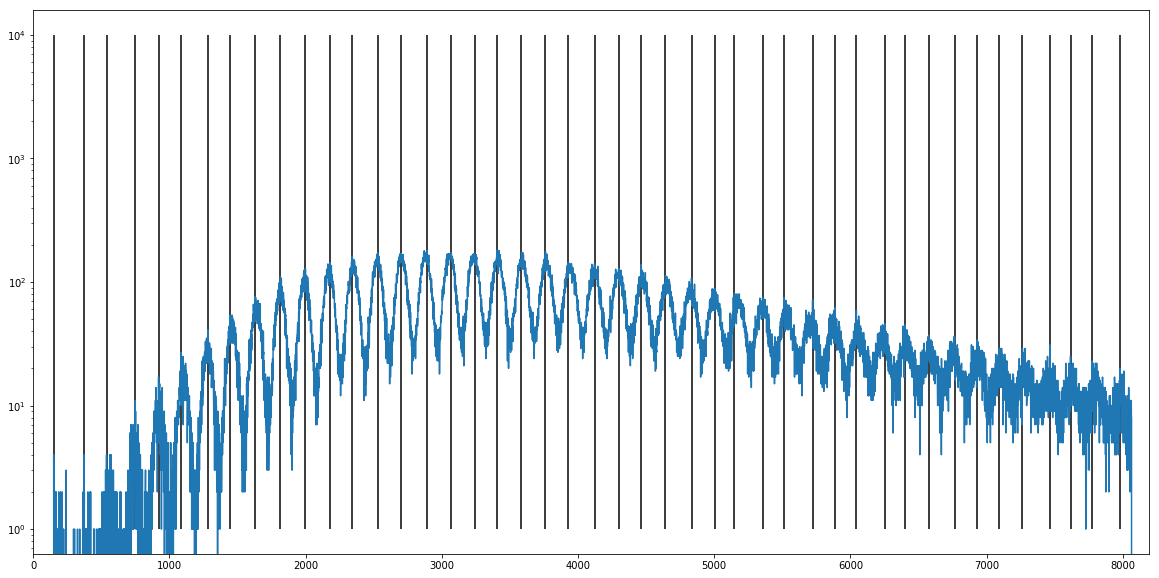

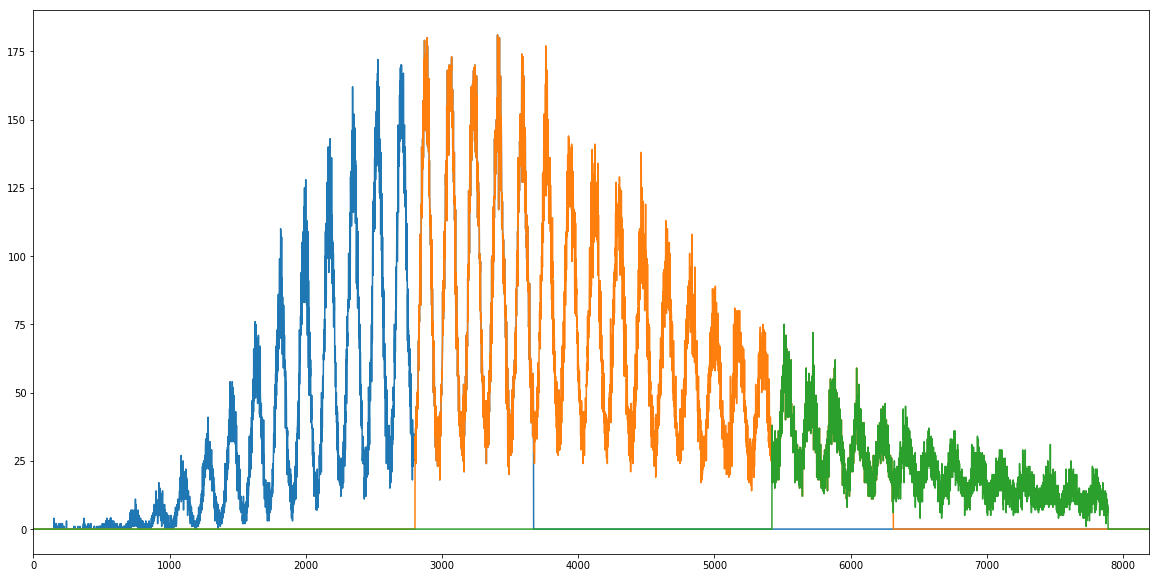

Window_25
Average Distance: 178.8409090909091
First Peak: 171
Last Peak: 8040
Total Number of Peaks: 45
[ 171  387  566  739  926 1108 1300 1462 1653 1832 2013 2197 2366 2547
 2732 2916 3097 3269 3439 3628 3818 3980 4170 4338 4528 4705 4870 5044
 5241 5424 5573 5763 5938 6110 6333 6493 6646 6830 7022 7191 7364 7545
 7690 7908 8040]
56
['Window_0', 'Window_1', 'Window_2', 'Window_3', 'Window_4', 'Window_5', 'Window_6', 'Window_7', 'Window_8', 'Window_9', 'Window_10', 'Window_11', 'Window_12', 'Window_13', 'Window_14', 'Window_15', 'Window_16', 'Window_17', 'Window_18', 'Window_19', 'Window_20', 'Window_21', 'Window_22', 'Window_23', 'Window_24', 'Window_25', 'Window_26', 'Window_27', 'Window_28', 'Window_29', 'Window_30', 'Window_31', 'Window_32', 'Window_33', 'Window_34', 'Window_35', 'Window_36', 'Window_37', 'Window_38', 'Window_39', 'Window_40', 'Window_41', 'Window_42', 'Window_43', 'Window_44', 'Window_45', 'Window_46', 'Window_47', 'Window_48', 'Window_49', 'Window_50', 'Window_5

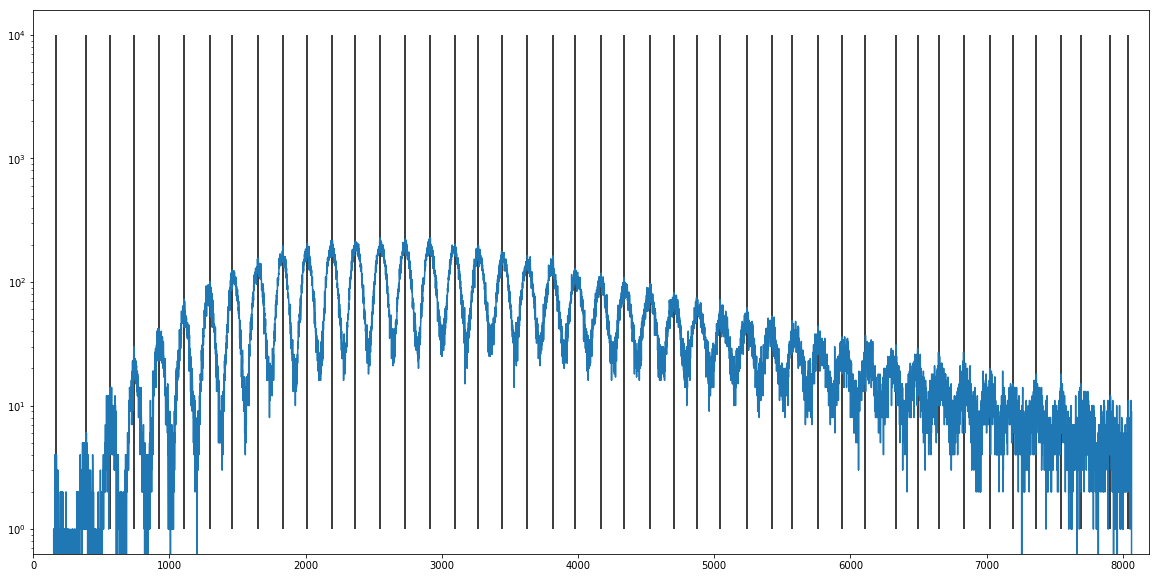

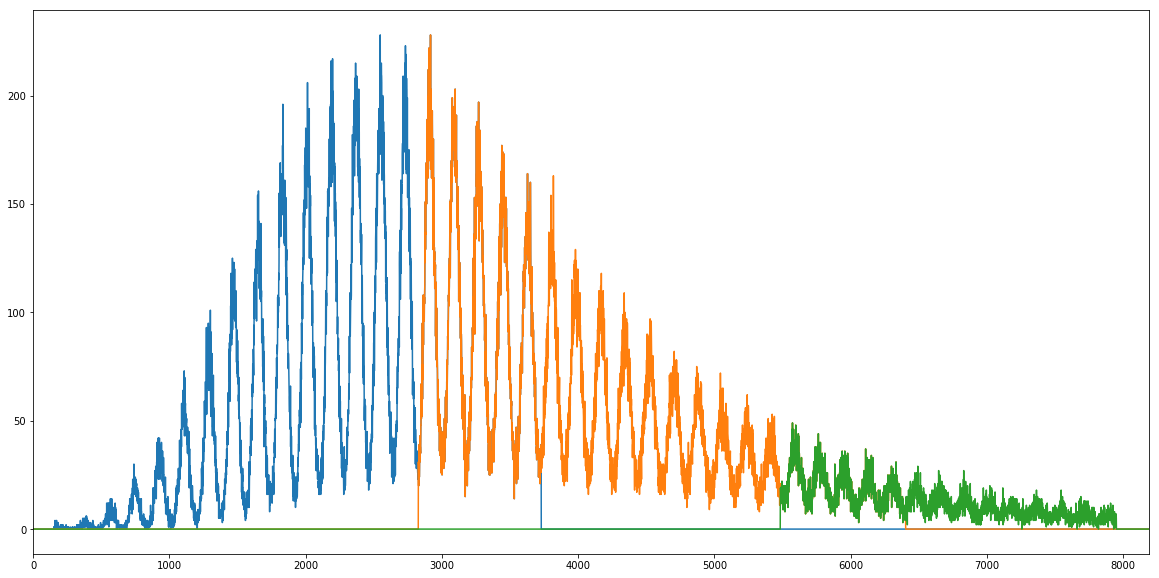

Window_26
Average Distance: 178.8181818181818
First Peak: 164
Last Peak: 8032
Total Number of Peaks: 45
[ 164  354  566  768  914 1104 1272 1483 1639 1834 2007 2190 2357 2555
 2707 2911 3072 3253 3449 3613 3789 3974 4156 4329 4505 4695 4856 5042
 5221 5410 5566 5733 5928 6097 6276 6430 6663 6806 7014 7139 7341 7519
 7676 7842 8032]
59
['Window_0', 'Window_1', 'Window_2', 'Window_3', 'Window_4', 'Window_5', 'Window_6', 'Window_7', 'Window_8', 'Window_9', 'Window_10', 'Window_11', 'Window_12', 'Window_13', 'Window_14', 'Window_15', 'Window_16', 'Window_17', 'Window_18', 'Window_19', 'Window_20', 'Window_21', 'Window_22', 'Window_23', 'Window_24', 'Window_25', 'Window_26', 'Window_27', 'Window_28', 'Window_29', 'Window_30', 'Window_31', 'Window_32', 'Window_33', 'Window_34', 'Window_35', 'Window_36', 'Window_37', 'Window_38', 'Window_39', 'Window_40', 'Window_41', 'Window_42', 'Window_43', 'Window_44', 'Window_45', 'Window_46', 'Window_47', 'Window_48', 'Window_49', 'Window_50', 'Window_5

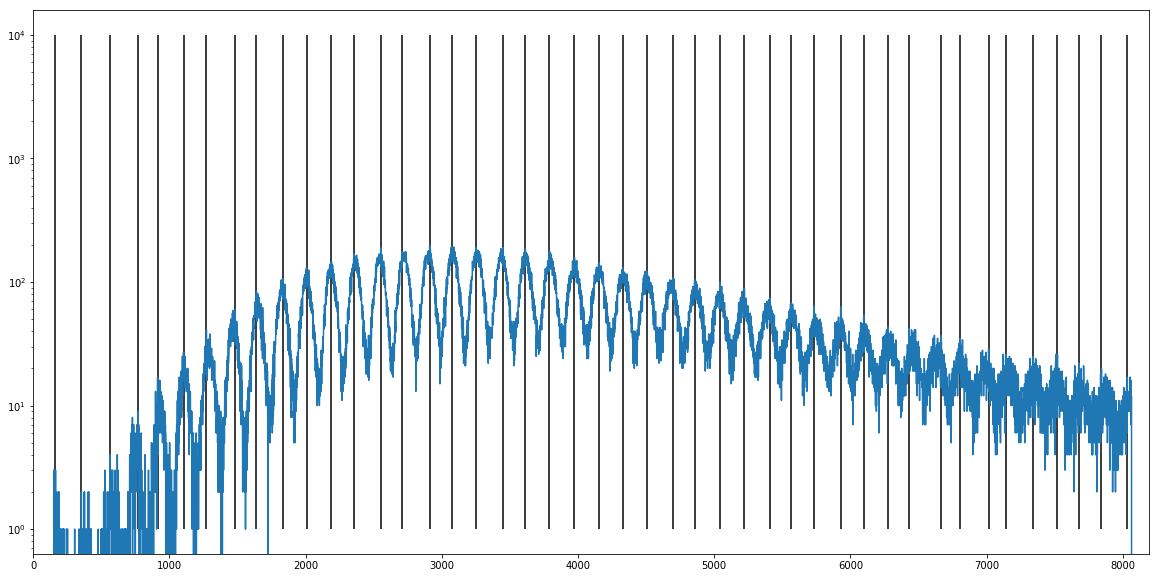

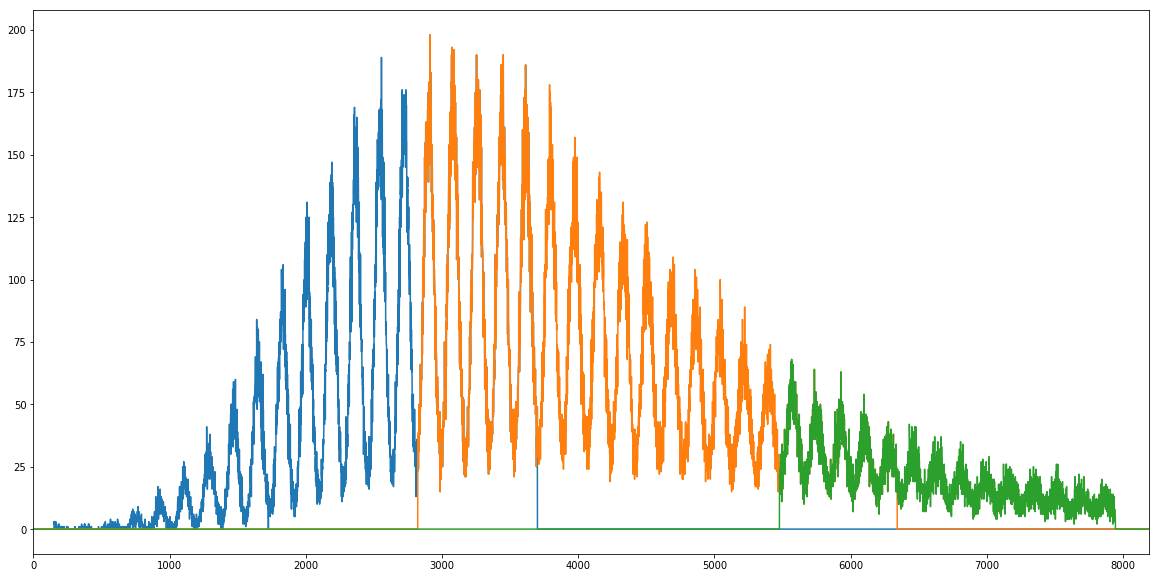

Window_27
Average Distance: 178.25
First Peak: 185
Last Peak: 8028
Total Number of Peaks: 45
[ 185  424  546  734  912 1093 1280 1465 1635 1824 1999 2183 2363 2532
 2710 2898 3078 3259 3442 3599 3777 3972 4128 4316 4487 4661 4866 5050
 5207 5378 5555 5744 5919 6095 6260 6452 6589 6813 6980 7139 7314 7481
 7670 7838 8028]
62
['Window_0', 'Window_1', 'Window_2', 'Window_3', 'Window_4', 'Window_5', 'Window_6', 'Window_7', 'Window_8', 'Window_9', 'Window_10', 'Window_11', 'Window_12', 'Window_13', 'Window_14', 'Window_15', 'Window_16', 'Window_17', 'Window_18', 'Window_19', 'Window_20', 'Window_21', 'Window_22', 'Window_23', 'Window_24', 'Window_25', 'Window_26', 'Window_27', 'Window_28', 'Window_29', 'Window_30', 'Window_31', 'Window_32', 'Window_33', 'Window_34', 'Window_35', 'Window_36', 'Window_37', 'Window_38', 'Window_39', 'Window_40', 'Window_41', 'Window_42', 'Window_43', 'Window_44', 'Window_45', 'Window_46', 'Window_47', 'Window_48', 'Window_49', 'Window_50', 'Window_51', 'Window

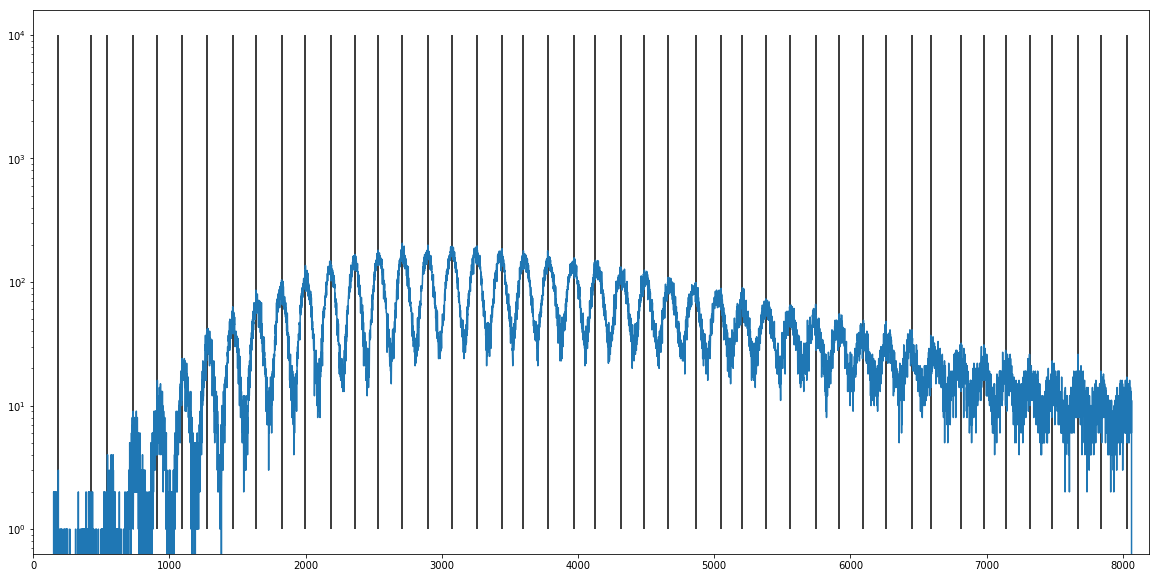

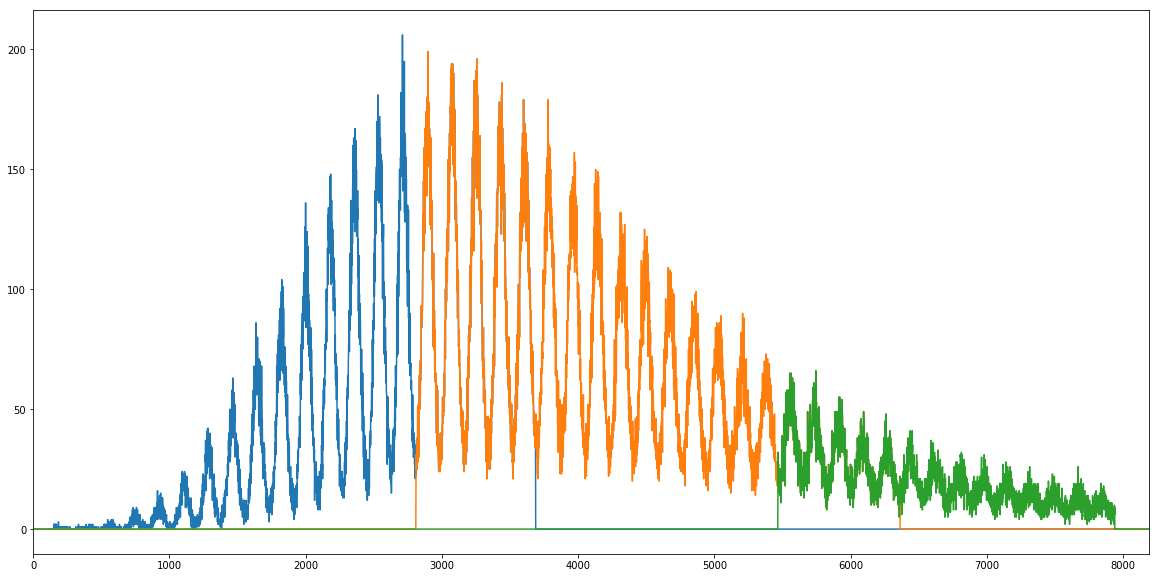

Window_28
Average Distance: 177.8409090909091
First Peak: 179
Last Peak: 8004
Total Number of Peaks: 45
[ 179  424  559  736  924 1091 1289 1474 1648 1822 1995 2175 2360 2528
 2702 2878 3058 3237 3410 3595 3780 3952 4134 4311 4479 4661 4852 5018
 5207 5377 5533 5730 5900 6068 6259 6409 6624 6778 6924 7118 7283 7489
 7687 7831 8004]
65
['Window_0', 'Window_1', 'Window_2', 'Window_3', 'Window_4', 'Window_5', 'Window_6', 'Window_7', 'Window_8', 'Window_9', 'Window_10', 'Window_11', 'Window_12', 'Window_13', 'Window_14', 'Window_15', 'Window_16', 'Window_17', 'Window_18', 'Window_19', 'Window_20', 'Window_21', 'Window_22', 'Window_23', 'Window_24', 'Window_25', 'Window_26', 'Window_27', 'Window_28', 'Window_29', 'Window_30', 'Window_31', 'Window_32', 'Window_33', 'Window_34', 'Window_35', 'Window_36', 'Window_37', 'Window_38', 'Window_39', 'Window_40', 'Window_41', 'Window_42', 'Window_43', 'Window_44', 'Window_45', 'Window_46', 'Window_47', 'Window_48', 'Window_49', 'Window_50', 'Window_5

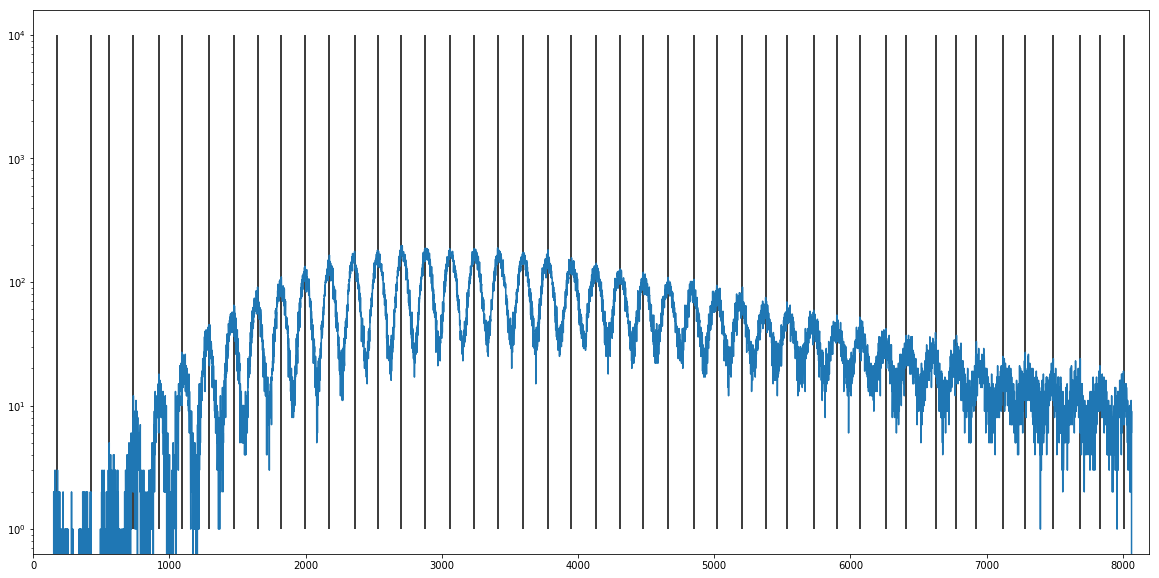

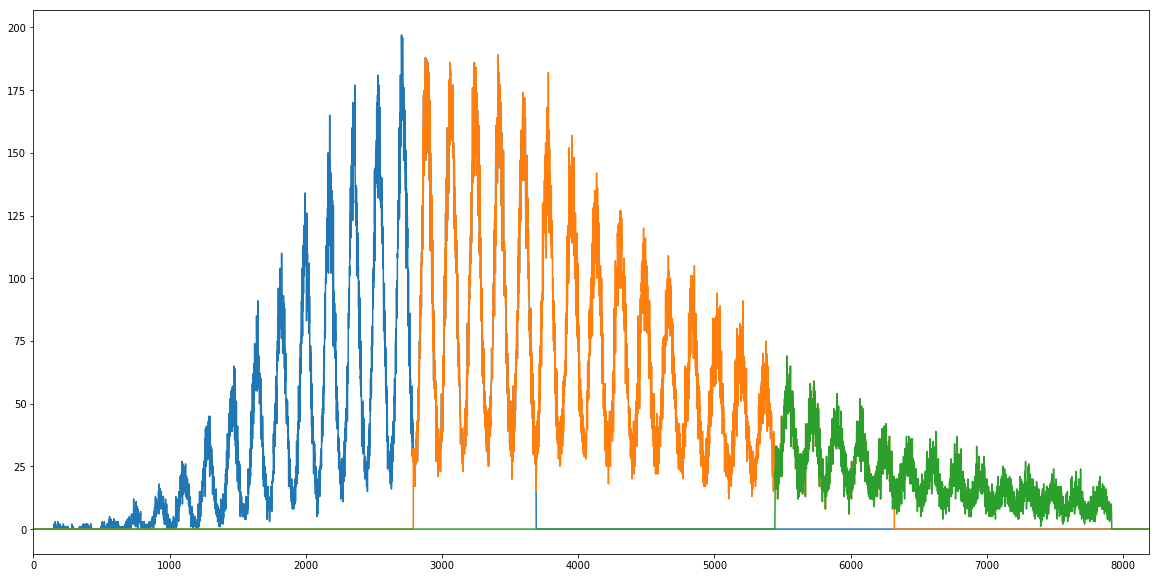

Window_29
Average Distance: 176.8181818181818
First Peak: 174
Last Peak: 7954
Total Number of Peaks: 45
[ 174  375  571  737  896 1106 1296 1462 1638 1814 1976 2172 2330 2521
 2698 2871 3049 3218 3394 3577 3748 3918 4095 4280 4437 4638 4815 4987
 5166 5320 5505 5686 5885 6052 6219 6400 6550 6735 6888 7092 7273 7428
 7595 7752 7954]
68
['Window_0', 'Window_1', 'Window_2', 'Window_3', 'Window_4', 'Window_5', 'Window_6', 'Window_7', 'Window_8', 'Window_9', 'Window_10', 'Window_11', 'Window_12', 'Window_13', 'Window_14', 'Window_15', 'Window_16', 'Window_17', 'Window_18', 'Window_19', 'Window_20', 'Window_21', 'Window_22', 'Window_23', 'Window_24', 'Window_25', 'Window_26', 'Window_27', 'Window_28', 'Window_29', 'Window_30', 'Window_31', 'Window_32', 'Window_33', 'Window_34', 'Window_35', 'Window_36', 'Window_37', 'Window_38', 'Window_39', 'Window_40', 'Window_41', 'Window_42', 'Window_43', 'Window_44', 'Window_45', 'Window_46', 'Window_47', 'Window_48', 'Window_49', 'Window_50', 'Window_5

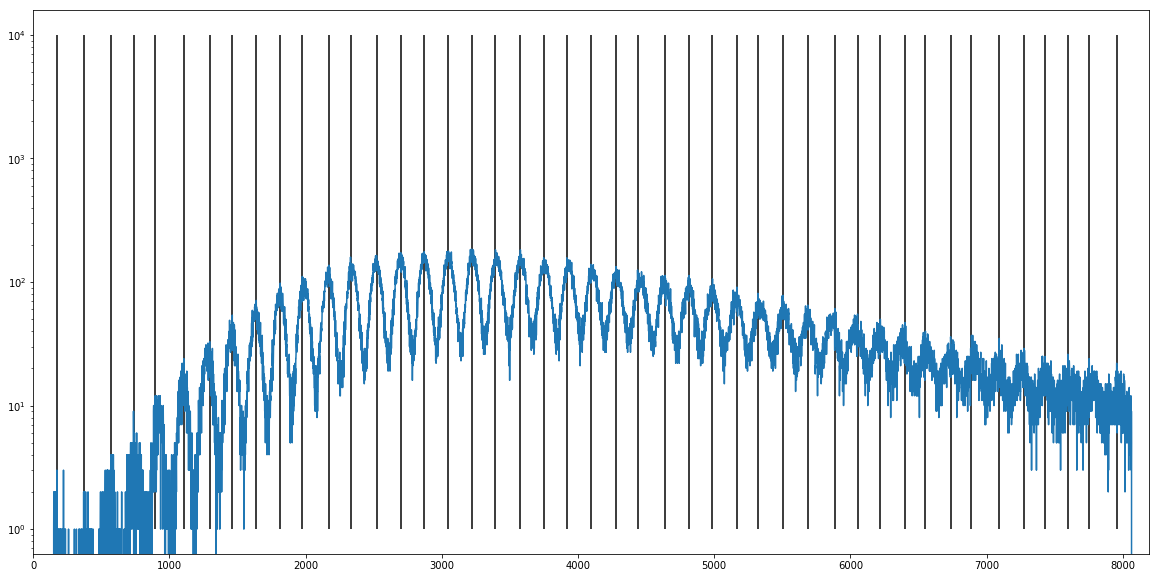

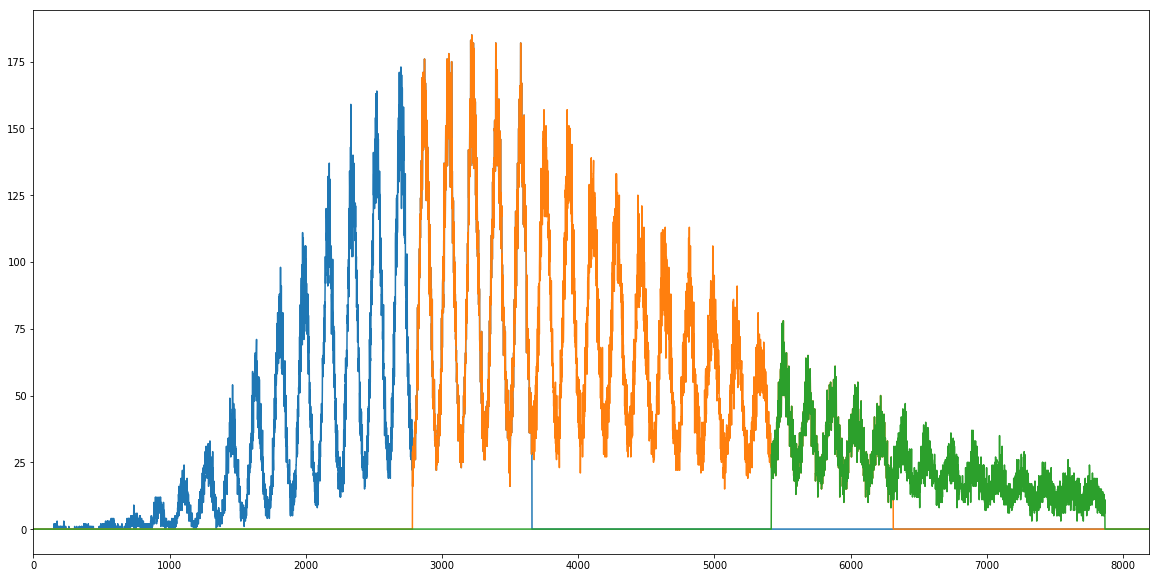

Window_3
Average Distance: 182.48837209302326
First Peak: 214
Last Peak: 8061
Total Number of Peaks: 44
[ 214  382  574  769  946 1137 1320 1500 1681 1870 2055 2241 2413 2609
 2793 2974 3145 3347 3530 3722 3896 4085 4242 4440 4632 4803 5000 5164
 5354 5552 5709 5900 6073 6244 6445 6633 6802 6967 7155 7333 7532 7717
 7903 8061]
71
['Window_0', 'Window_1', 'Window_2', 'Window_3', 'Window_4', 'Window_5', 'Window_6', 'Window_7', 'Window_8', 'Window_9', 'Window_10', 'Window_11', 'Window_12', 'Window_13', 'Window_14', 'Window_15', 'Window_16', 'Window_17', 'Window_18', 'Window_19', 'Window_20', 'Window_21', 'Window_22', 'Window_23', 'Window_24', 'Window_25', 'Window_26', 'Window_27', 'Window_28', 'Window_29', 'Window_30', 'Window_31', 'Window_32', 'Window_33', 'Window_34', 'Window_35', 'Window_36', 'Window_37', 'Window_38', 'Window_39', 'Window_40', 'Window_41', 'Window_42', 'Window_43', 'Window_44', 'Window_45', 'Window_46', 'Window_47', 'Window_48', 'Window_49', 'Window_50', 'Window_51', '

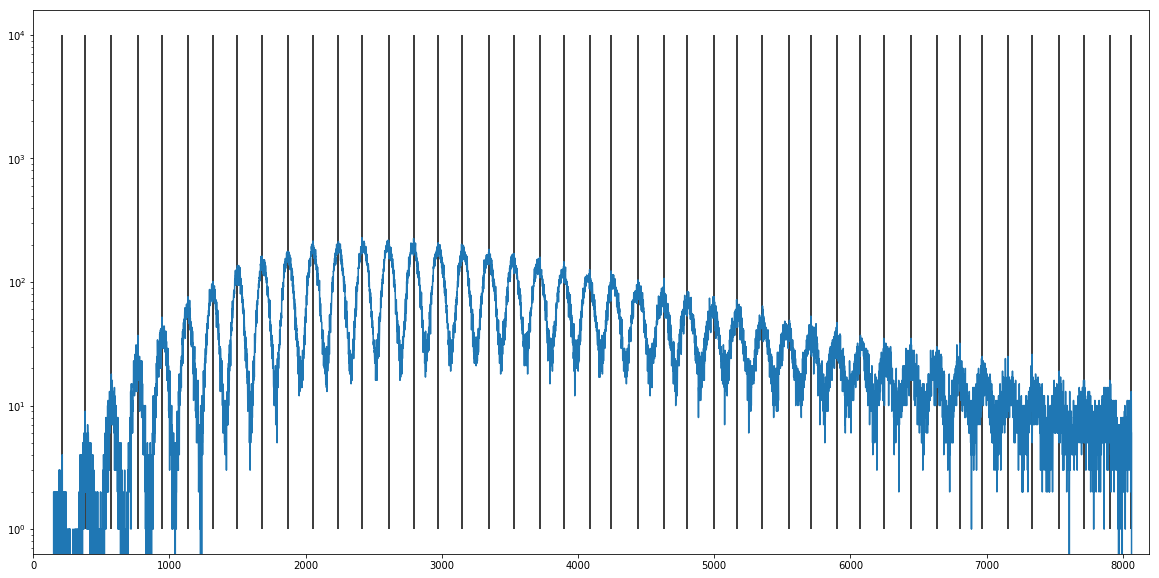

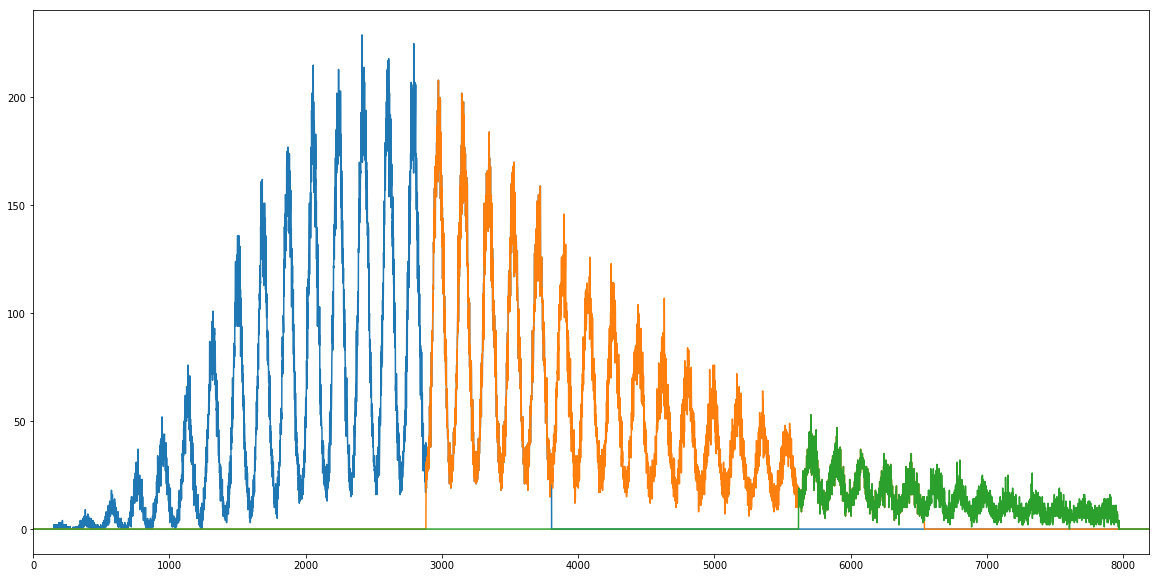

Window_4
Average Distance: 181.7906976744186
First Peak: 230
Last Peak: 8047
Total Number of Peaks: 44
[ 230  384  576  760  943 1142 1316 1494 1681 1873 2056 2239 2424 2587
 2785 2964 3148 3333 3507 3714 3893 4066 4265 4427 4611 4795 4970 5151
 5326 5522 5711 5882 6065 6217 6394 6606 6827 6994 7156 7305 7482 7646
 7824 8047]
74
['Window_0', 'Window_1', 'Window_2', 'Window_3', 'Window_4', 'Window_5', 'Window_6', 'Window_7', 'Window_8', 'Window_9', 'Window_10', 'Window_11', 'Window_12', 'Window_13', 'Window_14', 'Window_15', 'Window_16', 'Window_17', 'Window_18', 'Window_19', 'Window_20', 'Window_21', 'Window_22', 'Window_23', 'Window_24', 'Window_25', 'Window_26', 'Window_27', 'Window_28', 'Window_29', 'Window_30', 'Window_31', 'Window_32', 'Window_33', 'Window_34', 'Window_35', 'Window_36', 'Window_37', 'Window_38', 'Window_39', 'Window_40', 'Window_41', 'Window_42', 'Window_43', 'Window_44', 'Window_45', 'Window_46', 'Window_47', 'Window_48', 'Window_49', 'Window_50', 'Window_51', 'W

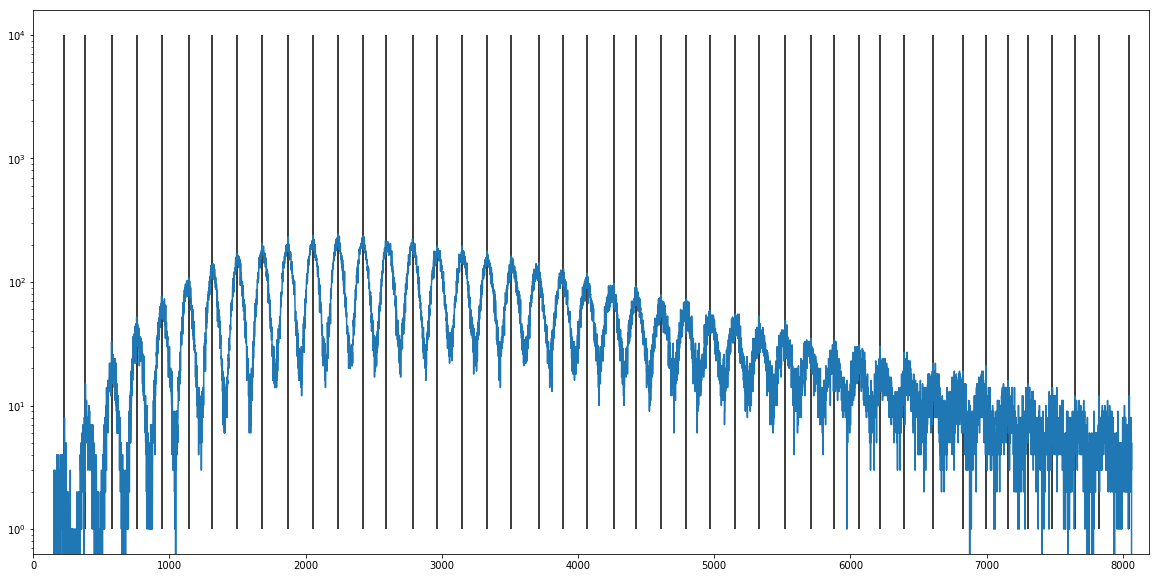

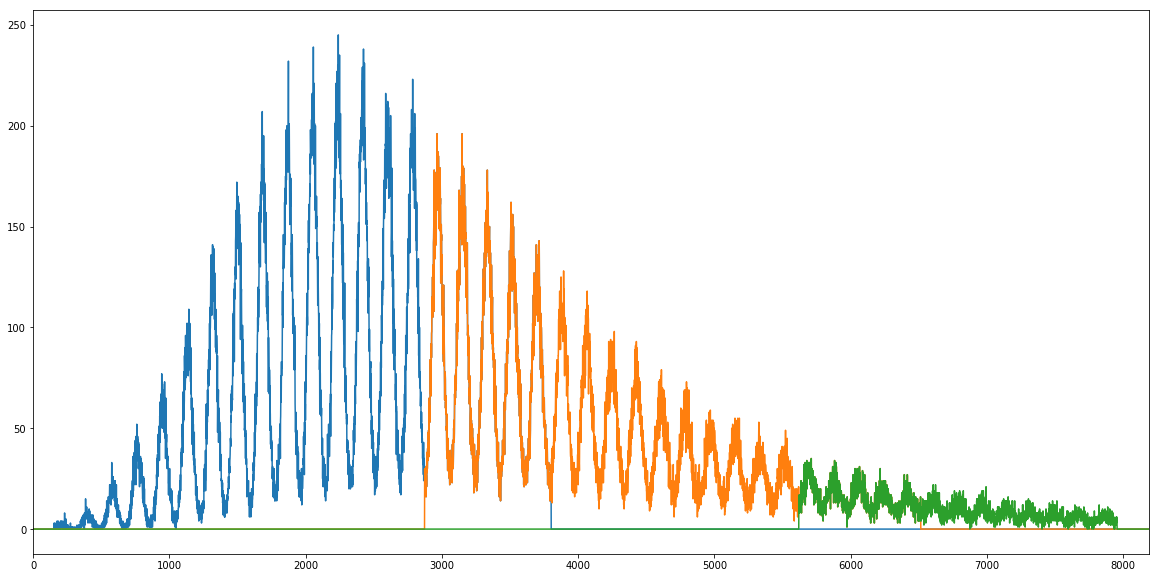

Window_5
Average Distance: 182.41860465116278
First Peak: 193
Last Peak: 8037
Total Number of Peaks: 44
[ 193  382  572  752  939 1127 1306 1495 1683 1859 2051 2240 2413 2600
 2784 2968 3139 3322 3519 3700 3893 4069 4252 4433 4601 4780 4959 5166
 5349 5506 5682 5876 6075 6221 6452 6598 6782 6958 7112 7324 7489 7683
 7873 8037]
77
['Window_0', 'Window_1', 'Window_2', 'Window_3', 'Window_4', 'Window_5', 'Window_6', 'Window_7', 'Window_8', 'Window_9', 'Window_10', 'Window_11', 'Window_12', 'Window_13', 'Window_14', 'Window_15', 'Window_16', 'Window_17', 'Window_18', 'Window_19', 'Window_20', 'Window_21', 'Window_22', 'Window_23', 'Window_24', 'Window_25', 'Window_26', 'Window_27', 'Window_28', 'Window_29', 'Window_30', 'Window_31', 'Window_32', 'Window_33', 'Window_34', 'Window_35', 'Window_36', 'Window_37', 'Window_38', 'Window_39', 'Window_40', 'Window_41', 'Window_42', 'Window_43', 'Window_44', 'Window_45', 'Window_46', 'Window_47', 'Window_48', 'Window_49', 'Window_50', 'Window_51', '

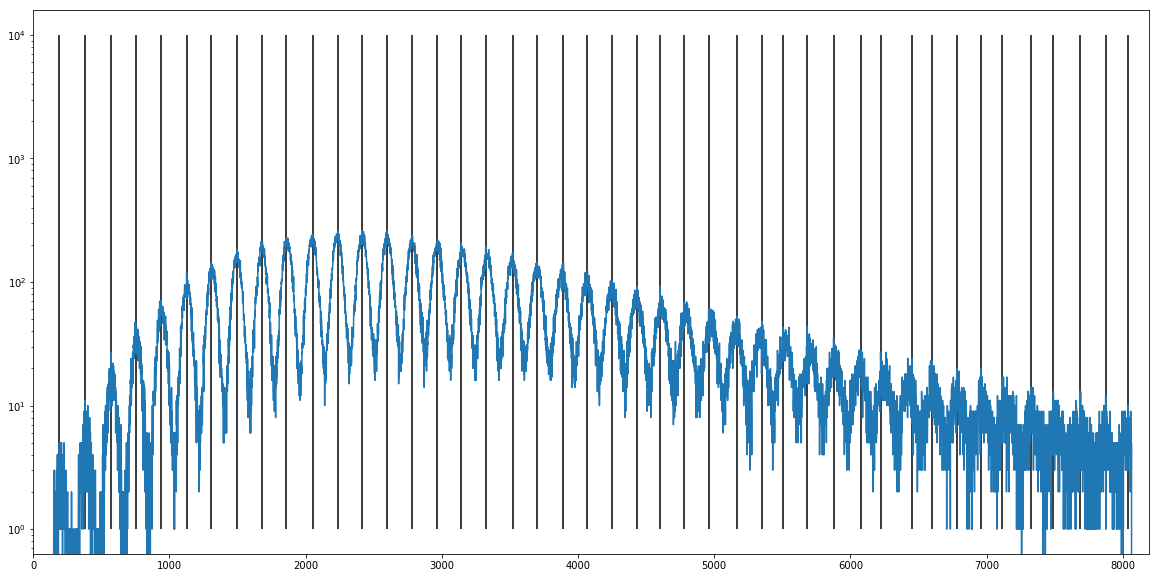

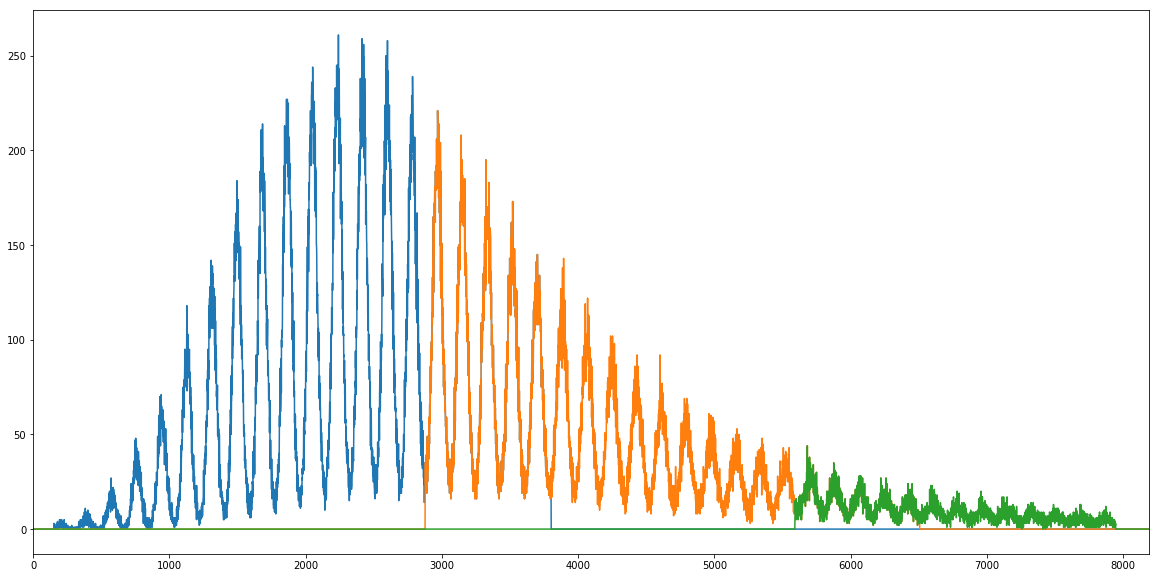

Window_6
Average Distance: 181.27906976744185
First Peak: 205
Last Peak: 8000
Total Number of Peaks: 44
[ 205  400  569  759  952 1130 1308 1506 1664 1870 2041 2232 2414 2596
 2773 2966 3150 3326 3507 3685 3879 4066 4229 4425 4597 4786 4972 5132
 5348 5529 5669 5878 6064 6246 6390 6586 6759 6939 7133 7324 7465 7638
 7829 8000]
80
['Window_0', 'Window_1', 'Window_2', 'Window_3', 'Window_4', 'Window_5', 'Window_6', 'Window_7', 'Window_8', 'Window_9', 'Window_10', 'Window_11', 'Window_12', 'Window_13', 'Window_14', 'Window_15', 'Window_16', 'Window_17', 'Window_18', 'Window_19', 'Window_20', 'Window_21', 'Window_22', 'Window_23', 'Window_24', 'Window_25', 'Window_26', 'Window_27', 'Window_28', 'Window_29', 'Window_30', 'Window_31', 'Window_32', 'Window_33', 'Window_34', 'Window_35', 'Window_36', 'Window_37', 'Window_38', 'Window_39', 'Window_40', 'Window_41', 'Window_42', 'Window_43', 'Window_44', 'Window_45', 'Window_46', 'Window_47', 'Window_48', 'Window_49', 'Window_50', 'Window_51', '

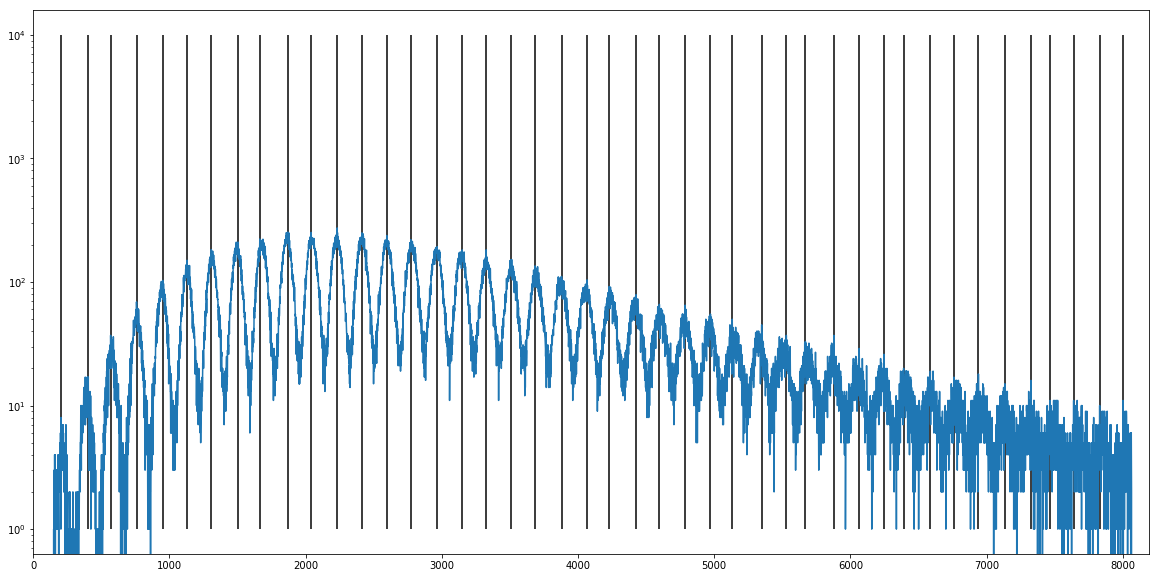

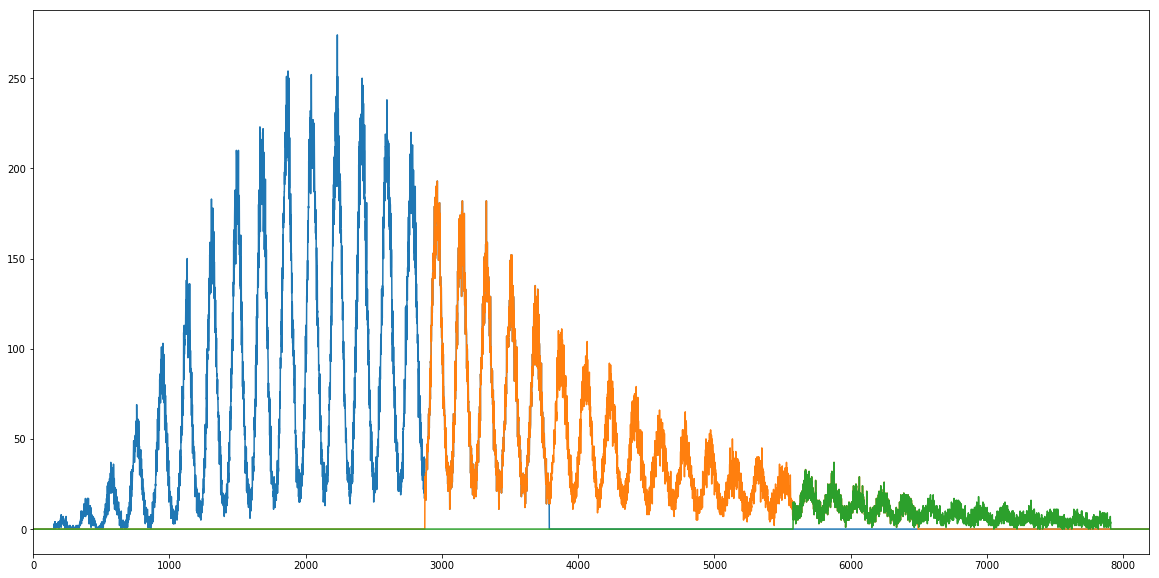

Window_7
Average Distance: 182.27906976744185
First Peak: 186
Last Peak: 8024
Total Number of Peaks: 44
[ 186  385  565  759  940 1131 1317 1496 1685 1865 2064 2242 2414 2603
 2785 2974 3159 3337 3508 3703 3877 4072 4235 4438 4617 4779 4972 5175
 5333 5536 5712 5891 6066 6257 6420 6624 6824 6965 7157 7317 7487 7680
 7882 8024]
83
['Window_0', 'Window_1', 'Window_2', 'Window_3', 'Window_4', 'Window_5', 'Window_6', 'Window_7', 'Window_8', 'Window_9', 'Window_10', 'Window_11', 'Window_12', 'Window_13', 'Window_14', 'Window_15', 'Window_16', 'Window_17', 'Window_18', 'Window_19', 'Window_20', 'Window_21', 'Window_22', 'Window_23', 'Window_24', 'Window_25', 'Window_26', 'Window_27', 'Window_28', 'Window_29', 'Window_30', 'Window_31', 'Window_32', 'Window_33', 'Window_34', 'Window_35', 'Window_36', 'Window_37', 'Window_38', 'Window_39', 'Window_40', 'Window_41', 'Window_42', 'Window_43', 'Window_44', 'Window_45', 'Window_46', 'Window_47', 'Window_48', 'Window_49', 'Window_50', 'Window_51', '

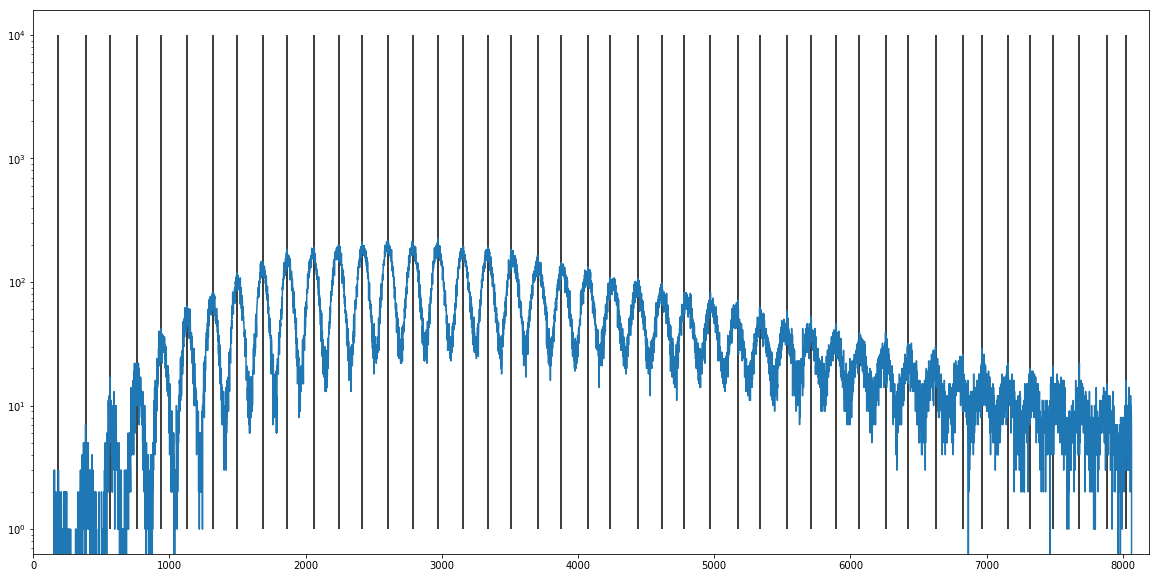

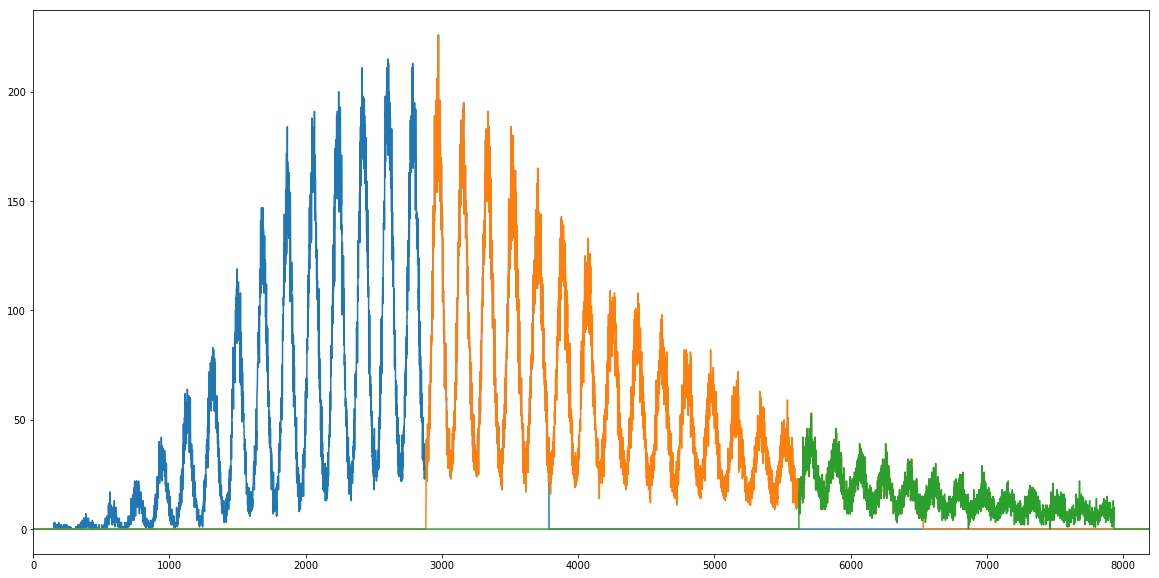

Window_8
Average Distance: 182.0
First Peak: 224
Last Peak: 8050
Total Number of Peaks: 44
[ 224  392  566  768  948 1136 1328 1508 1709 1874 2067 2258 2432 2632
 2804 2996 3163 3350 3542 3717 3898 4083 4250 4445 4627 4811 4970 5170
 5368 5537 5746 5885 6082 6281 6459 6613 6810 6984 7162 7348 7539 7747
 7895 8050]
86
['Window_0', 'Window_1', 'Window_2', 'Window_3', 'Window_4', 'Window_5', 'Window_6', 'Window_7', 'Window_8', 'Window_9', 'Window_10', 'Window_11', 'Window_12', 'Window_13', 'Window_14', 'Window_15', 'Window_16', 'Window_17', 'Window_18', 'Window_19', 'Window_20', 'Window_21', 'Window_22', 'Window_23', 'Window_24', 'Window_25', 'Window_26', 'Window_27', 'Window_28', 'Window_29', 'Window_30', 'Window_31', 'Window_32', 'Window_33', 'Window_34', 'Window_35', 'Window_36', 'Window_37', 'Window_38', 'Window_39', 'Window_40', 'Window_41', 'Window_42', 'Window_43', 'Window_44', 'Window_45', 'Window_46', 'Window_47', 'Window_48', 'Window_49', 'Window_50', 'Window_51', 'Window_52', '

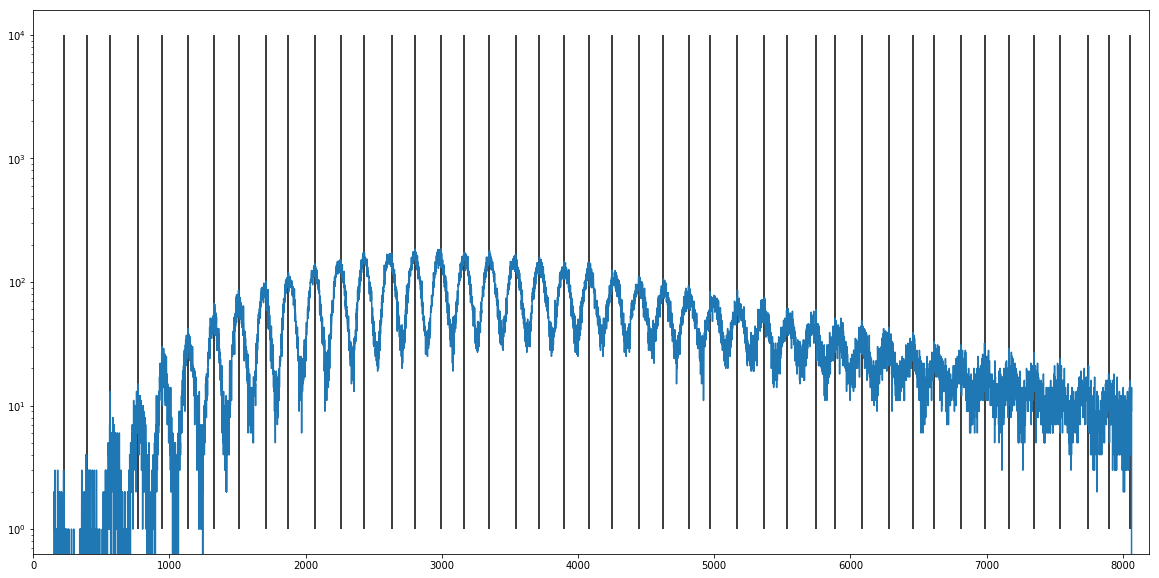

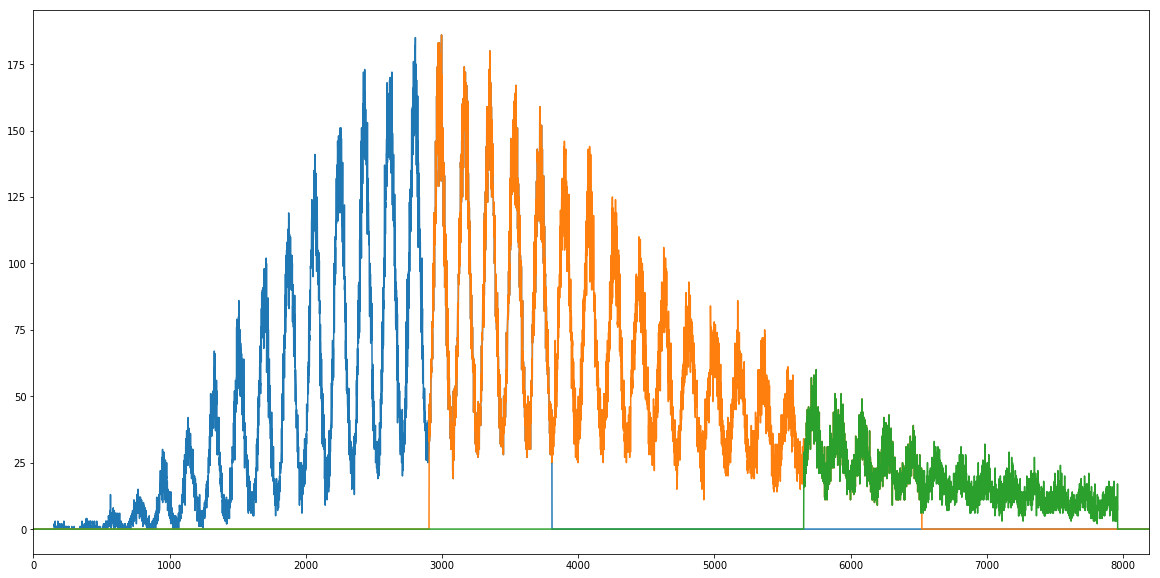

Window_9
Average Distance: 181.0
First Peak: 218
Last Peak: 8001
Total Number of Peaks: 44
[ 218  398  583  764  952 1138 1322 1512 1674 1874 2051 2243 2417 2597
 2796 2979 3144 3322 3508 3695 3884 4058 4227 4425 4593 4792 4966 5150
 5311 5518 5713 5873 6066 6212 6396 6601 6798 6933 7126 7317 7494 7704
 7829 8001]
89
['Window_0', 'Window_1', 'Window_2', 'Window_3', 'Window_4', 'Window_5', 'Window_6', 'Window_7', 'Window_8', 'Window_9', 'Window_10', 'Window_11', 'Window_12', 'Window_13', 'Window_14', 'Window_15', 'Window_16', 'Window_17', 'Window_18', 'Window_19', 'Window_20', 'Window_21', 'Window_22', 'Window_23', 'Window_24', 'Window_25', 'Window_26', 'Window_27', 'Window_28', 'Window_29', 'Window_30', 'Window_31', 'Window_32', 'Window_33', 'Window_34', 'Window_35', 'Window_36', 'Window_37', 'Window_38', 'Window_39', 'Window_40', 'Window_41', 'Window_42', 'Window_43', 'Window_44', 'Window_45', 'Window_46', 'Window_47', 'Window_48', 'Window_49', 'Window_50', 'Window_51', 'Window_52', '

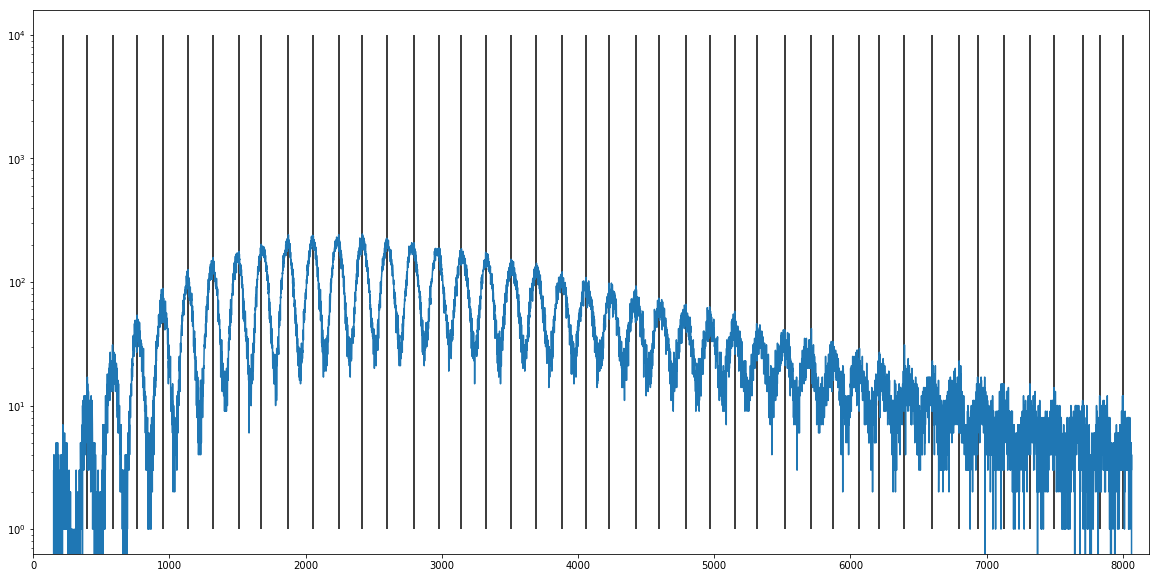

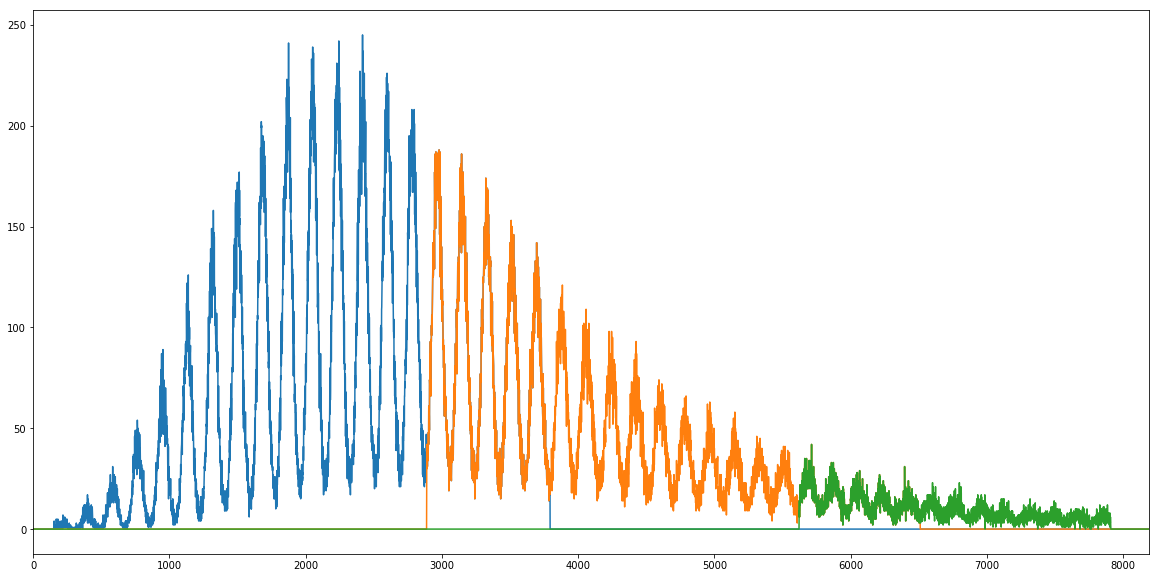

In [22]:
newt = mod.dataFile(path = data.path, file="{}_Ch_0_00_Window_Hist.txt".format(data.path.split('/')[-2]))
for number, column in enumerate(ring):
    print(column)
#     loc = [sp.signal.find_peaks(data.get(column), distance=90, height=60)[0][1:],
#            sp.signal.find_peaks(data.get(column), distance=90, height=60)[0][1:], 
#            sp.signal.find_peaks(data.get(column), distance=90, height=60)[0][1:],
#            sp.signal.find_peaks(data.get(column), distance=90, height=60)[0][1:],
#            sp.signal.find_peaks(data.get(column), distance=90, height=60)[0][1:],
#            sp.signal.find_peaks(data.get(column), distance=90, height=60)[0][1:]][number]
    loc = sp.signal.find_peaks(data.get(column), distance=120, height=2)[0]#[1:]
#     loc = [sp.signal.find_peaks(data.get(column), distance=50, height=60)[0][0:],
#            sp.signal.find_peaks(data.get(column), distance=50, height=60)[0][0:], 
#            sp.signal.find_peaks(data.get(column), distance=18, height=60)[0][2:]][number]
    me = np.mean(loc[1:] - loc[:-1])
    yaxis = data.get(column)
    xaxis = data.get(xcol)[:yaxis.size]
    print("Average Distance:", me)
    print("First Peak:", loc[0])
    print("Last Peak:", loc[-1])
    print("Total Number of Peaks:", len(loc))
    fig, ax = plt.subplots(figsize = (20, 10))
    ax.plot(xaxis, yaxis)
    ax.vlines(xaxis[loc], 1, 10000)
    #win = [7, 7, 8, 8, 6] #190601
#     win = [6, 6, 6, 8] #190623
#     win = [5,5,5,5,5,5] #190626
#     win = [6, 6, 6] #190905
    win = np.ones(len(data.keys()[:-1]))*3
    window = int(win[number])
    count = len(newt.keys())
    print(loc)
    for value in range(window):
        if loc.size > 20*(value + 1):
            end = loc[20*(value + 1)- 5*value*(value != 0)]
        else:
            end = loc[-1]
        if 20*value - 5*value*(value != 0) < loc.size:
            tag = ((loc[20*value - 5*value*(value != 0)] - me/2 <= xaxis) & 
                   (xaxis <= end - me/2))
        else:
            tag = np.ones(yaxis.size).astype(bool)
        newt.set('_'.join(['Window', str(value + count)]), yaxis*tag.astype(int))
    print(str(value + count))
    
    fig, bx = plt.subplots(figsize = (20, 10))
    print(sorted(newt.keys(), key = lambda line: int(line.split('_')[1])))
    for line in sorted(newt.keys(), 
                       key = lambda line: int(line.split('_')[1]))[int(sum(win[:number])):]:
        print(line)
        bx.plot(xaxis, newt.get(line))
#     bx.set_xlim(0, [8192, 4096][number == 2])
    bx.set_xlim(0, 8192)

    
    for value in range(window):
        if loc.size > 20*(value + 1):
            end = loc[20*(value + 1)- 5*value*(value != 0)]
        else:
            end = loc[-1]
#         ax.fill_between((loc[20*value - 5*value*(value != 0)] - me/2,
#                          end - me/2), 
#                         1, (windows - value)*1e4, color = mod.colors(-10, value))
    num = 0
#     ax.set_xlim(num*6000, [(num + 1)*6000, 2048][number == 2])
    ax.set_xlim(0, 8192)
    ax.set_yscale('log')
    plt.show()

In [23]:
# newt.set('x_axis', data.get('MCA Channel')[:8192] + 0.5)
newt.set('x_axis', data.get('x_axis'))
newt.save(Columns = ['x_axis'] + sorted(newt.keys()[:-1], key = lambda line: int(line.split('_')[1])))

In [26]:

for num in range(3):
    ring = ['x_axis'] + sorted(newt.keys()[:-1], key = lambda line: int(line.split('_')[1]))[num::3]
    dump = mod.dataFile(path = data.path,
                        file="{}_Ch_{}_00_Window_Hist.txt".format(data.path.split('/')[-2], 2*num))
    for line in ring:
        dump.set(line, newt.get(line))
    dump.save(Columns = ['x_axis'] + sorted(dump.keys()[:-1], key = lambda line: int(line.split('_')[1])))
    

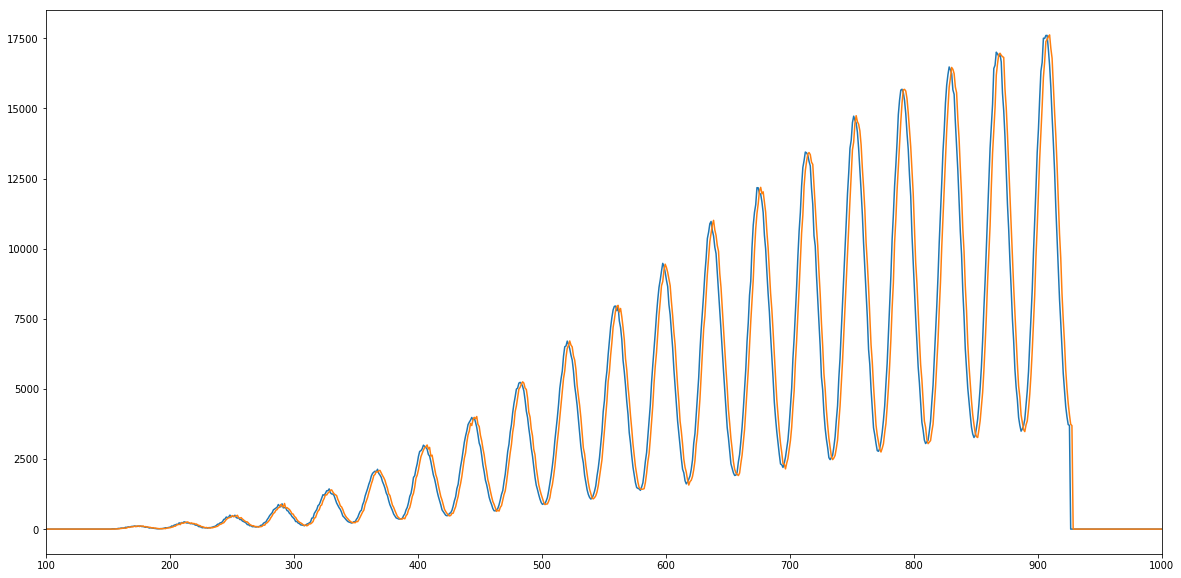

Ch0_138um_Ortec1_p59c
Ch0_138um_Ortec2_p59c


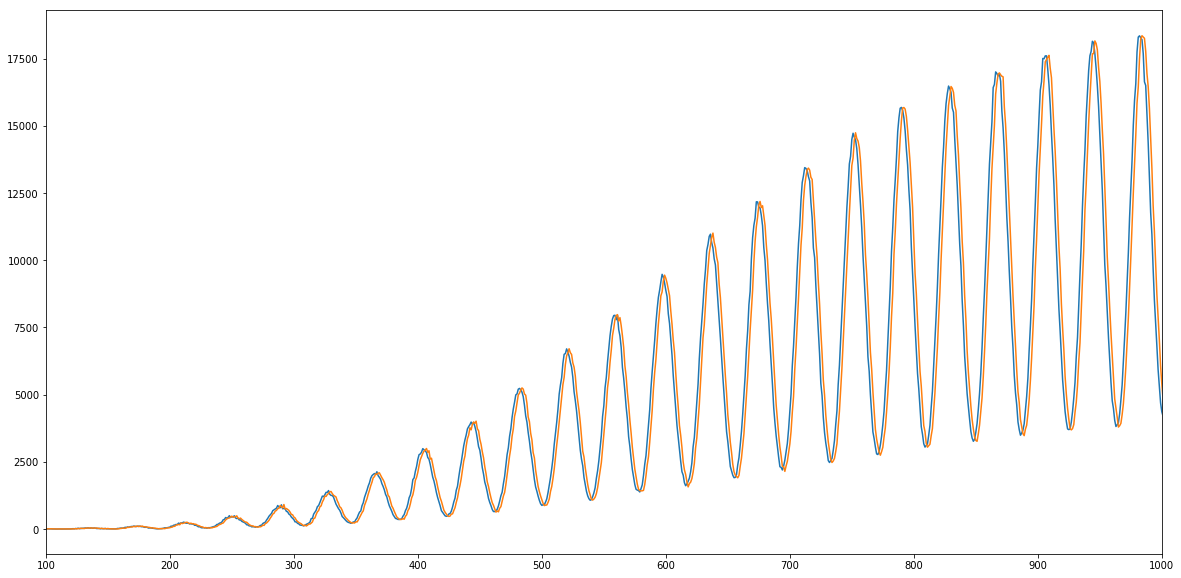

In [340]:
newt.set('x_axis', data.get('Channel')[:8192] + 0.5)
fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(newt.get('x_axis'), newt.get('Window_0'))
ax.plot(newt.get('x_axis'), newt.get('Window_6'))
ax.set_xlim(100, 1000)
#ax.set_xlim(1275, 1630)
plt.show()

fig, bx = plt.subplots(figsize = (20, 10))
for number, column in enumerate(data.keys()[:2]):
    print(column)
    yaxis = data.get(column)
    bx.plot(xaxis, yaxis)
    bx.set_xlim(100, 1000)
plt.show()

In [327]:
host = mod.impData(Path = "/Applications/Data-Processed/Livermore/190623/Acq_Test/",
                    fileList=["Acq_Test_Ch_12_01_Parameters.txt"], tline = 0)
print(host.keys())
print(max(host.get('000_Time Slice')))
for value in range(int(max(host.get('000_Time Slice'))) + 1):
    print(value, '\t', sum(host.get('000_Time Slice') == value))

['000_Time Slice', '001_Energy', '002_Centroid (Ch)', '003_dC (Ch)', '004_Sigma (Ch)', '005_dS (Ch)', '006_Area (cts/Ch)', '007_dA (cts/Ch)']
25.0
0 	 20
1 	 20
2 	 20
3 	 20
4 	 20
5 	 20
6 	 20
7 	 20
8 	 20
9 	 20
10 	 20
11 	 20
12 	 20
13 	 20
14 	 20
15 	 20
16 	 20
17 	 20
18 	 20
19 	 20
20 	 20
21 	 20
22 	 20
23 	 20
24 	 20
25 	 20
